Component parameters at -55C and +70C
====
Last update:  10 July 2018  
Python code to interpolate parameters at 70C and extrapolate parameters to -55C.  
  
Parts included in the notebook:  
  
| PN | Mfg | Description |
|:------|:-----|:------|
| BFCN-4800+ | Minicircuits | Bandpass Filter, 4400 to 5200 MHz |
| CLM-83-2W+ | Minicircuits | Limiter |
| QPL9503 | Qorvo | Ultra Low-Noise, Flat Gain LNA |
| QPC6324 | Qorvo | Absorptive, High Isolation SPDT Switch |
| TQP3M9037 | Qorvo | Ultra Low-Noise, High Linearity LNA |
| LFCN-2500+| Minicircuits | Low Pass Filter  DC to 2500 MHz |
| LFCN-1700+ | Minicircuits | Low Pass Filter |
| LFCN-2400+ | Minicircuits | Low Pass Filter |
| PGA-105+ | Minicircuits | Ultra Flat Gain, Low Noise/High Dynamic Range Monolithic Amplifier 0.04 to 2.6 GHz|
| MAC-42 | Minicircuits | Frequency Mixer |
| XLF-112H+ | Minicircuits | Low Pass Filter |
| YAT-1+ | Minicircuits | Fixed Attenuator |
| YAT-2+ | Minicircuits | Fixed Attenuator |
| RFSA3513 | Qorvo | Digital Step Attenuator |
| GP2X1+ | Minicircuits | Power Splitter/Combiner 2800 to 7200 MHz |
| | | |
  

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Minicircuits BFCN-4800+
Ceramic Bandpass Filter  
Maximum Ratings  
Operating Temperature -55°C to 100°C  
Storage Temperature -55°C to +100°C  
RF Power Input (1) 1.5W at 25°C  
(1) Passband rating, derate linearly to 0.25W (24 dBm) at 100°C ambient  

In [2]:
# from the data sheet, typical insertion loss data, probably at 20C
freq = np.array([4200.0,4400.0,4500.0,4600.0,4700.0,4800.0,4900.0,5000.0,5100.0,5200.0,5500.0,6000.0])

# insertion loss
insert_loss = np.array([1.12,0.79,0.72,0.69,0.67,0.67,0.69,0.71,0.75,0.81,1.30,5.05])

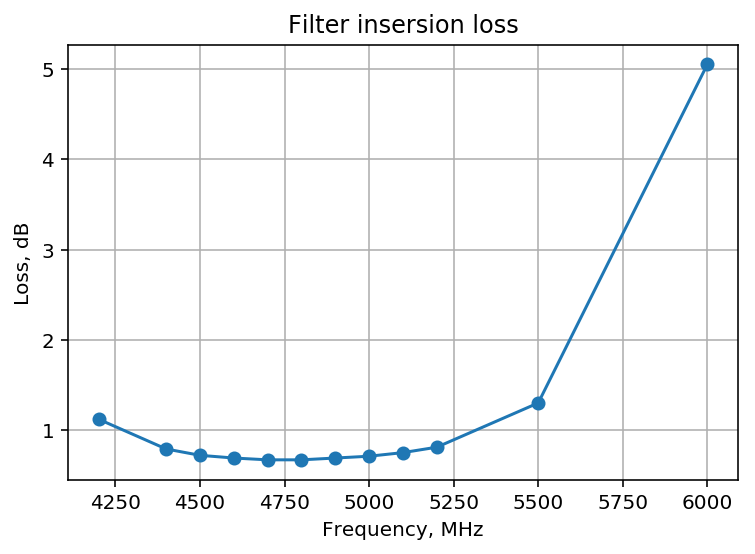

In [3]:
plt.plot(freq,insert_loss,'-o')
plt.grid()
plt.title('Filter insersion loss')
plt.xlabel('Frequency, MHz')
plt.ylabel('Loss, dB')
plt.show()

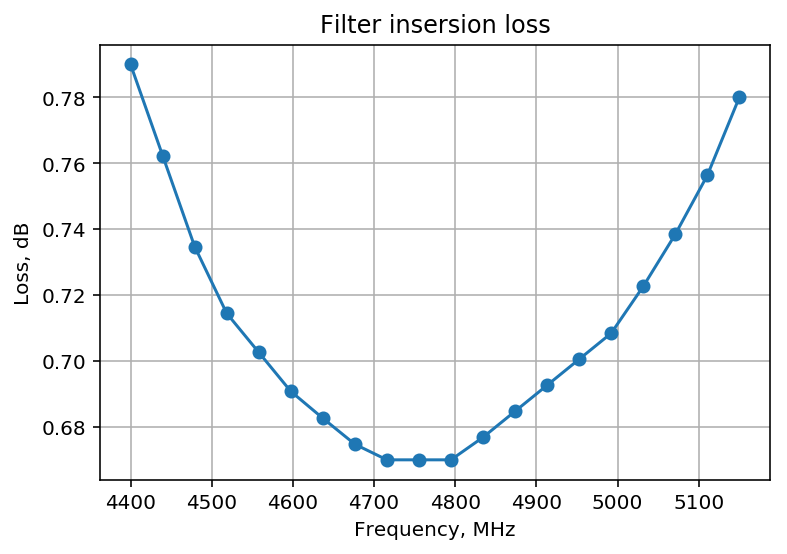

In [4]:
# C-Band: 4400 to 4940 MHz and 5091 to 5150 MHz
x = np.linspace(4400,5150,20,endpoint=True)
y = np.interp(x,freq,insert_loss)

plt.plot(x,y,'-o')

plt.grid()
plt.title('Filter insersion loss')
plt.xlabel('Frequency, MHz')
plt.ylabel('Loss, dB')

plt.show()

In [5]:
print('average insertion loss across band = {:f} dB'.format(y.mean()))

average insertion loss across band = 0.711145 dB


# Minicircuits CLM-83-2W+ Limiter
- 50Ω Broadband 30 to 8200 MHz  
- Ultra wide frequency range, 30 MHz to 8.2 GHz
- High CW input power, +32 dBm
- Limits from +12 to +32 dBm
- linear range upto 2dBm

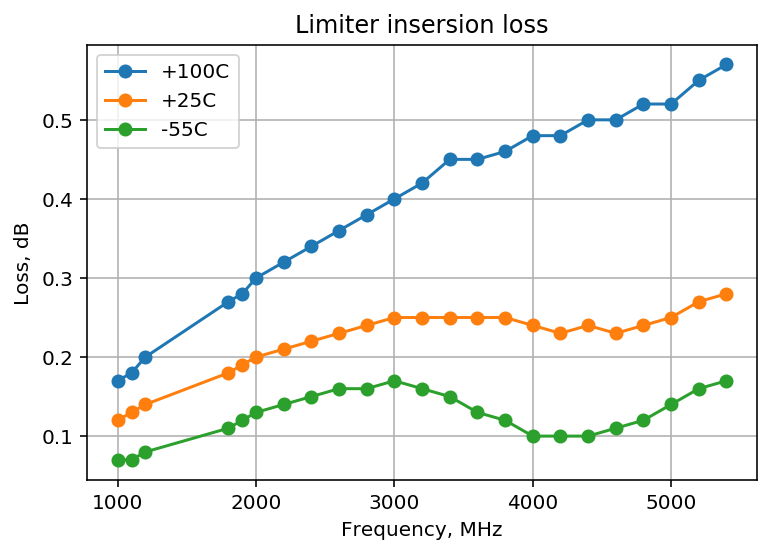

In [6]:
# from the data sheet
freq = np.array([1000.0,1100.0,1200.0,1800.0,1900.0,2000.0,2200.0,2400.0,2600.0,
    2800.0,3000.0,3200.0,3400.0,3600.0,3800.0,4000.0,4200.0,4400.0,4600.0,
    4800.0,5000.0,5200.0,5400.0])

# insertion loss at 25C
insert_loss_25C = np.array([0.12,0.13,0.14,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,
    0.25,0.25,0.25,0.25,0.24,0.23,0.24,0.23,0.24,0.25,0.27,0.28])

# insertion loss at -55C
insert_loss_N55C = np.array([0.07,0.07,0.08,0.11,0.12,0.13,0.14,0.15,0.16,0.16,0.17,
0.16,0.15,0.13,0.12,0.10,0.10,0.10,0.11,0.12,0.14,0.16,0.17])

# insertion loss at 100C
insert_loss_100C = np.array([0.17,0.18,0.20,0.27,0.28,0.30,0.32,0.34,0.36,0.38,0.40,
0.42,0.45,0.45,0.46,0.48,0.48,0.50,0.50,0.52,0.52,0.55,0.57])

plt.plot(freq,insert_loss_100C,'-o',label='+100C')
plt.plot(freq,insert_loss_25C,'-o',label='+25C')
plt.plot(freq,insert_loss_N55C,'-o',label='-55C')

plt.grid()
plt.legend()
plt.title('Limiter insersion loss')
plt.xlabel('Frequency, MHz')
plt.ylabel('Loss, dB')

plt.show()

## C-Band

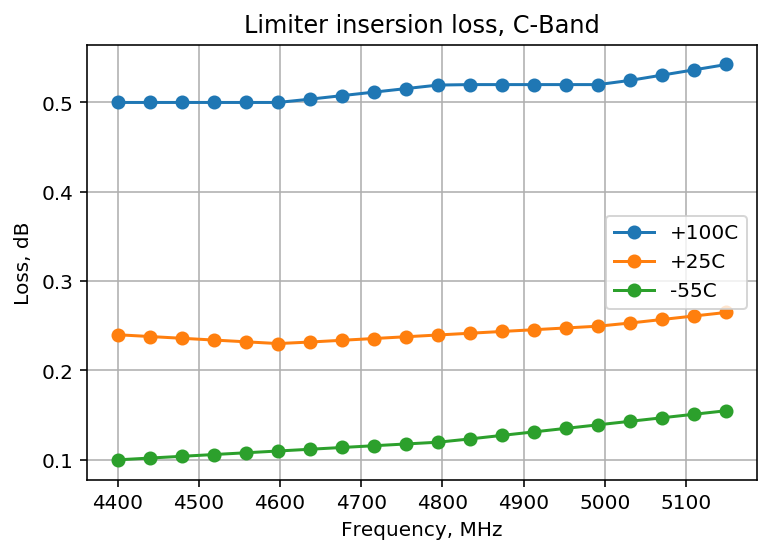

In [7]:
# C-Band: 4400 to 4940 MHz and 5091 to 5150 MHz
x = np.linspace(4400,5150,20,endpoint=True)
y_25C = np.interp(x,freq,insert_loss_25C)
y_N55C = np.interp(x,freq,insert_loss_N55C)
y_100C = np.interp(x,freq,insert_loss_100C)

plt.plot(x,y_100C,'-o',label='+100C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_N55C,'-o',label='-55C')

plt.grid()
plt.legend()
plt.title('Limiter insersion loss, C-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Loss, dB')

plt.show()

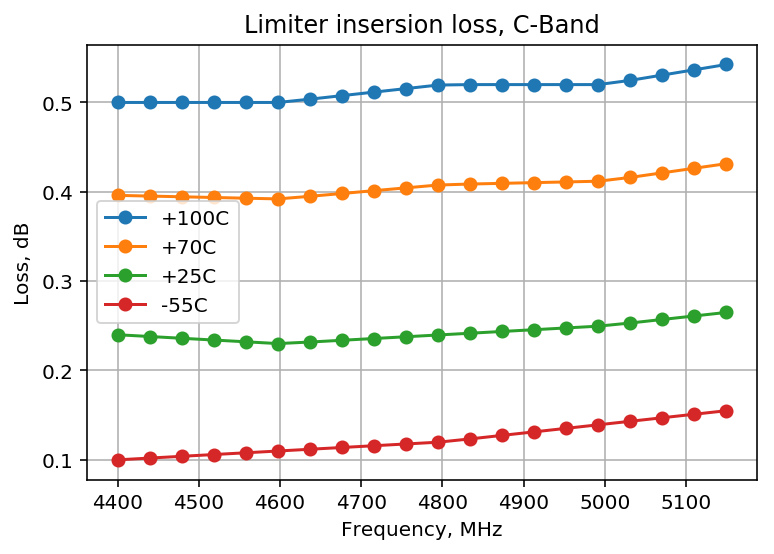

In [8]:
# interpolate to find insertion loss at 70C
t25 = np.ones(len(y_25C))*25
t100 = np.ones(len(y_100C))*100
y_70C = np.ones(len(y_100C))

for k in range(len(t25)):
    y_70C[k] = np.interp(70,[t25[k],t100[k]],[y_25C[k],y_100C[k]])

plt.plot(x,y_100C,'-o',label='+100C')
plt.plot(x,y_70C,'-o',label='+70C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_N55C,'-o',label='-55C')

plt.grid()
plt.legend()
plt.title('Limiter insersion loss, C-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Loss, dB')

plt.show()

In [9]:
print('average insertion loss at -55C = {:f}'.format(y_N55C.mean()))
print('average insertion loss at 25C = {:f}'.format(y_25C.mean()))
print('average insertion loss at 70C = {:f}'.format(y_70C.mean()))

average insertion loss at -55C = 0.123072
average insertion loss at 25C = 0.242697
average insertion loss at 70C = 0.405850


## S-Band

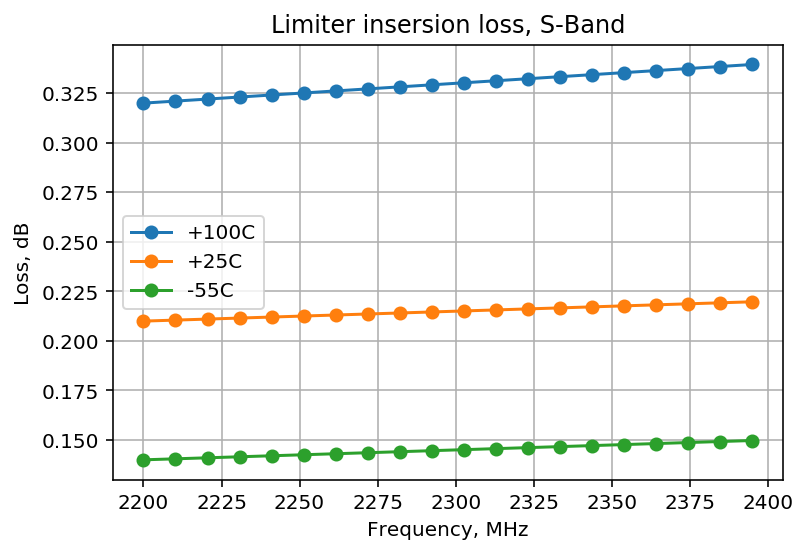

In [10]:
# S-Band: 2200 to 2395 MHz
x = np.linspace(2200,2395,20,endpoint=True)
y_25C = np.interp(x,freq,insert_loss_25C)
y_N55C = np.interp(x,freq,insert_loss_N55C)
y_100C = np.interp(x,freq,insert_loss_100C)

plt.plot(x,y_100C,'-o',label='+100C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_N55C,'-o',label='-55C')

plt.grid()
plt.legend()
plt.title('Limiter insersion loss, S-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Loss, dB')

plt.show()

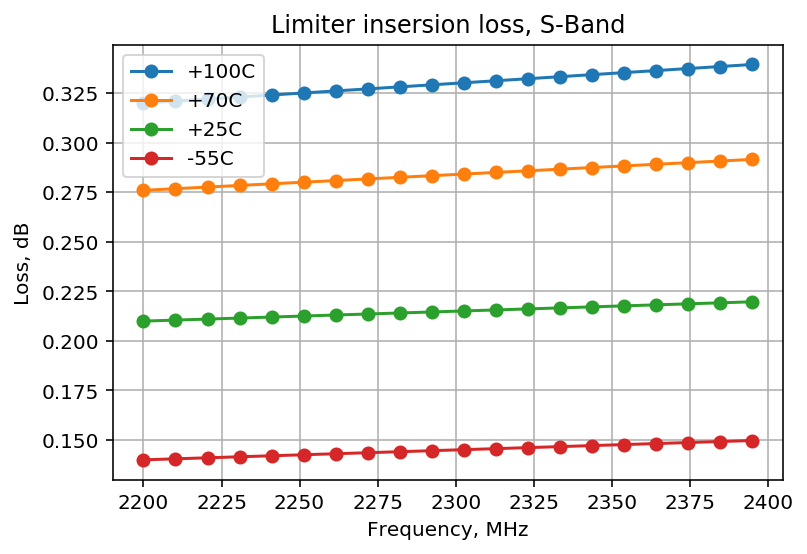

In [11]:
# interpolate to find insertion loss at 70C
t25 = np.ones(len(y_25C))*25
t100 = np.ones(len(y_100C))*100
y_70C = np.ones(len(y_100C))

for k in range(len(t25)):
    y_70C[k] = np.interp(70,[t25[k],t100[k]],[y_25C[k],y_100C[k]])

plt.plot(x,y_100C,'-o',label='+100C')
plt.plot(x,y_70C,'-o',label='+70C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_N55C,'-o',label='-55C')

plt.grid()
plt.legend()
plt.title('Limiter insersion loss, S-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Loss, dB')

plt.show()

In [12]:
print('mean insertion loss at -55C = {:f}'.format(y_N55C.mean()))
print('mean insertion loss at 25C = {:f}'.format(y_25C.mean()))
print('mean insertion loss at 70C = {:f}'.format(y_70C.mean()))

mean insertion loss at -55C = 0.144875
mean insertion loss at 25C = 0.214875
mean insertion loss at 70C = 0.283800


## L-Band

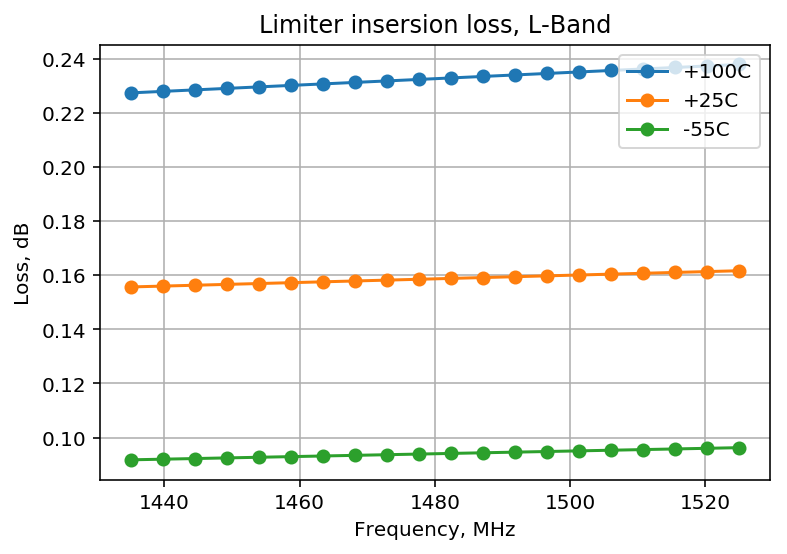

In [13]:
# S-Band: 1435 to 1525 MHz
x = np.linspace(1435,1525,20,endpoint=True)
y_25C = np.interp(x,freq,insert_loss_25C)
y_N55C = np.interp(x,freq,insert_loss_N55C)
y_100C = np.interp(x,freq,insert_loss_100C)

plt.plot(x,y_100C,'-o',label='+100C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_N55C,'-o',label='-55C')

plt.grid()
plt.legend()
plt.title('Limiter insersion loss, L-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Loss, dB')

plt.show()

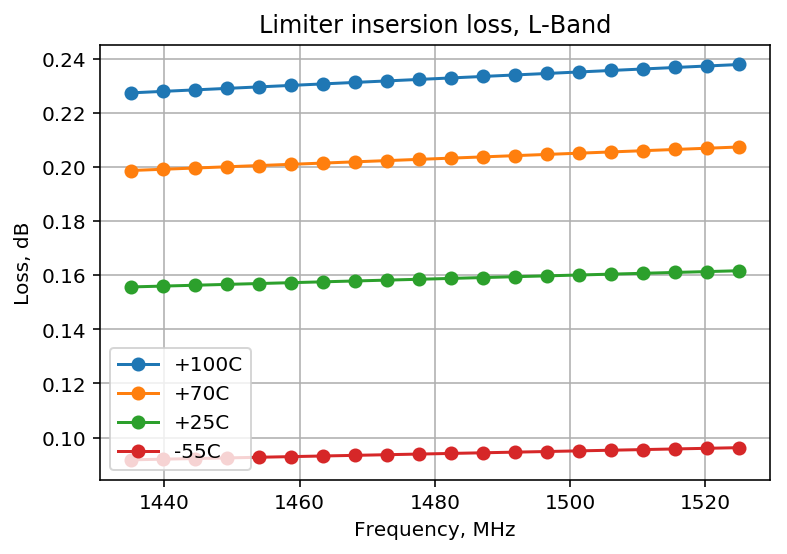

In [14]:
# interpolate to find insertion loss at 70C
t25 = np.ones(len(y_25C))*25
t100 = np.ones(len(y_100C))*100
y_70C = np.ones(len(y_100C))

for k in range(len(t25)):
    y_70C[k] = np.interp(70,[t25[k],t100[k]],[y_25C[k],y_100C[k]])

plt.plot(x,y_100C,'-o',label='+100C')
plt.plot(x,y_70C,'-o',label='+70C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_N55C,'-o',label='-55C')

plt.grid()
plt.legend()
plt.title('Limiter insersion loss, L-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Loss, dB')

plt.show()

In [15]:
print('mean insertion loss at -55C = {:f}'.format(y_N55C.mean()))
print('mean insertion loss at 25C = {:f}'.format(y_25C.mean()))
print('mean insertion loss at 70C = {:f}'.format(y_70C.mean()))

mean insertion loss at -55C = 0.094000
mean insertion loss at 25C = 0.158667
mean insertion loss at 70C = 0.203067


# QPL9503, Ultra Low-Noise, Flat Gain LNA
- 0.6-6 GHz Operational Bandwidth
- Ultra low noise figure, 0.95 dB NF @ 5.5 GHz
- Bias adjustable for linearity optimization
- 35.5 dBm OIP3 at 65mA IDD
- Shut-down mode pin with 1.8V TTL logic
- Unconditionally stable
- Integrated shutdown control pin
- Maintains OFF state with high Pin drive
- +3V to +5V supply; does not require -Vgg
  
**Absolute Maximum Ratings**  
- Storage Temperature −65 to 150°C
- Supply Voltage (VDD) +7 V
- RF Input Power, CW, 50Ω, T=25°C +30 dBm
- RF Input Power, WCDMA, 10dB PAR +27 dBm
- RF Input Power, CW, OFF State +30 dBm
  
![test](QPL9503_gain.png)  
The above plot is from the data sheet's test circuit.  Calculated Gt from s-parameters is higher.  
  
The sparameter file was read and S21 was converted to transducer gain.  For now assume that the input and output impediances are matched and reflections coefficients are, $\Gamma_L = \Gamma_S = 0$. So the transducer gain is:  
$G_t = |S_{21}|^2$  

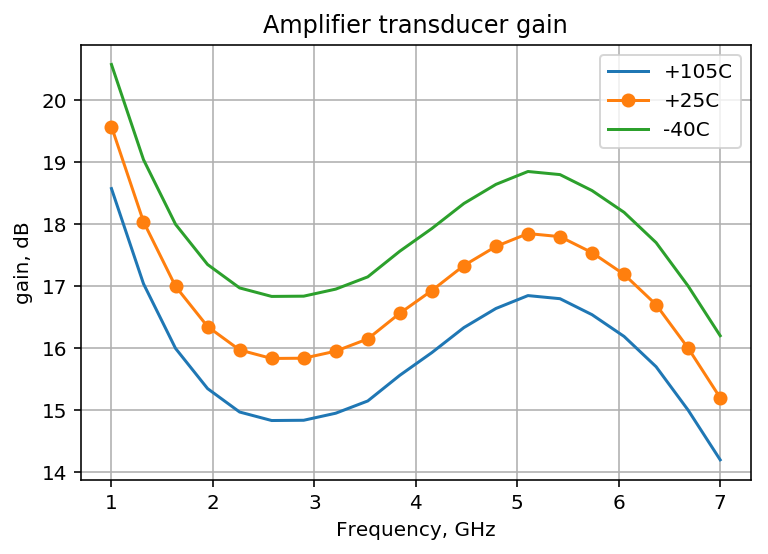

In [16]:
# s-parameter data and converted transducer gain at 25C
amp_Gt_dB = np.array([19.5710813 , 18.03721411, 16.99543593, 16.34759606, 15.97012951,
       15.83313421, 15.83720751, 15.95087316, 16.14826969, 16.56180842,
       16.92759919, 17.33079806, 17.63882755, 17.84647061, 17.79644449,
       17.5387792 , 17.18830929, 16.7 , 16., 15.19951794]) 
# need to check on 2nd and 3rd from last data point, values adjusted to make curve smooth

freq = np.linspace(1,7,20,endpoint=True)

# estimate Gt at other temperatures by offsetting the curves
gain_N40C = amp_Gt_dB+1 # gain at -40C
gain_25C = amp_Gt_dB # gain at 25C
gain_105C = amp_Gt_dB-1 # gain at 105C

plt.plot(freq,gain_105C,'-',label='+105C')
plt.plot(freq,gain_25C,'-o',label='+25C')
plt.plot(freq,gain_N40C,'-',label='-40C')

plt.grid()
plt.legend()
plt.title('Amplifier transducer gain')
plt.xlabel('Frequency, GHz')
plt.ylabel('gain, dB')

plt.show()

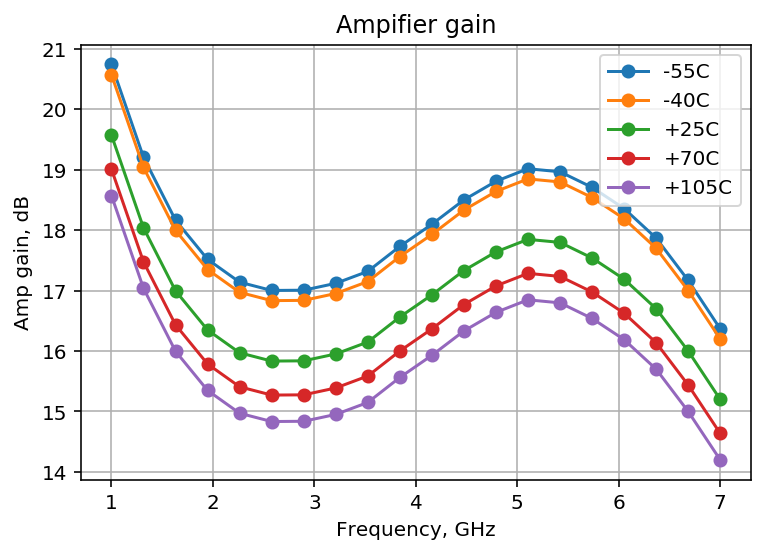

In [17]:
# interpolate to find gain at 70C
t25 = np.ones(len(gain_25C))*25
t105 = np.ones(len(gain_25C))*105
gain_70C = np.ones(len(gain_25C))

for k in range(len(t25)):
    gain_70C[k] = np.interp(70,[t25[k],t105[k]],[gain_25C[k],gain_105C[k]])

# extrapolate to find gain at -55C
tN40 = np.ones(len(gain_25C))*(-40)
gain_N55C = np.ones(len(gain_25C))

for k in range(len(t25)):
    p = np.polyfit([tN40[k],t25[k],t105[k]],[gain_N40C[k],gain_25C[k],gain_105C[k]], 1)
    gain_N55C[k] = np.polyval(p, -55)

# plot the new gain curves
plt.plot(freq,gain_N55C,'-o',label='-55C')
plt.plot(freq,gain_N40C,'-o',label='-40C')
plt.plot(freq,gain_25C,'-o',label='+25C')
plt.plot(freq,gain_70C,'-o',label='+70C')
plt.plot(freq,gain_105C,'-o',label='+105C')

plt.grid()
plt.legend()
plt.title('Ampifier gain')
plt.xlabel('Frequency, GHz')
plt.ylabel('Amp gain, dB')

plt.show()

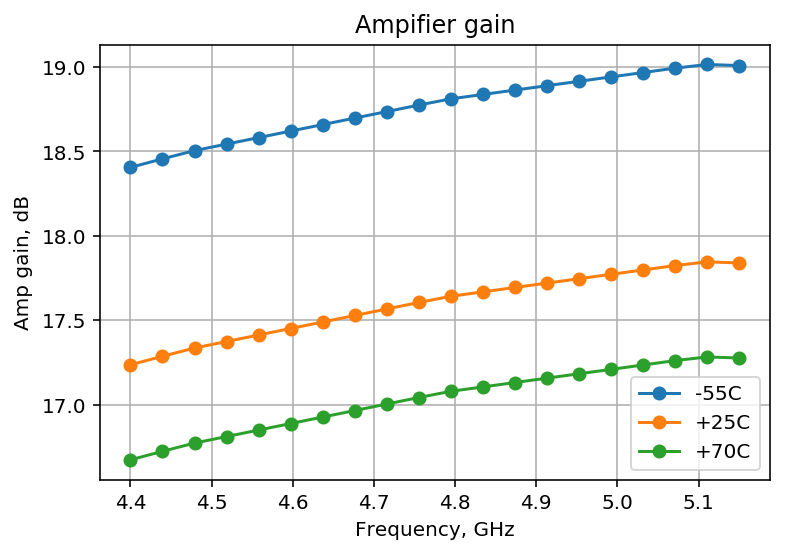

In [18]:
# linearly interpolate to get more data points across C-Band
#freq = np.linspace(1,7,20,endpoint=True)
x = np.linspace(4.400,5.150,20,endpoint=True)

y_25C = np.interp(x,freq,gain_25C)
y_N55C = np.interp(x,freq,gain_N55C)
y_70C = np.interp(x,freq,gain_70C)

# plot the new gain curves
plt.plot(x,y_N55C,'-o',label='-55C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_70C,'-o',label='+70C')

plt.grid()
plt.legend()
plt.title('Ampifier gain')
plt.xlabel('Frequency, GHz')
plt.ylabel('Amp gain, dB')

plt.show()

In [19]:
# find average gain at -55C, 25C and 70C across C-Band
print('average gain across C-Band at -55C = {:f} dB'.format(y_N55C.mean()))
print('average gain across C-Band at 25C = {:f} dB'.format(y_25C.mean()))
print('average gain across C-Band at 70C = {:f} dB'.format(y_70C.mean()))

average gain across C-Band at -55C = 18.760220 dB
average gain across C-Band at 25C = 17.591974 dB
average gain across C-Band at 70C = 17.029474 dB


![test](QPL9503_NF.png)  
NF data plot from datasheet.  Data used is from s-paramter file.

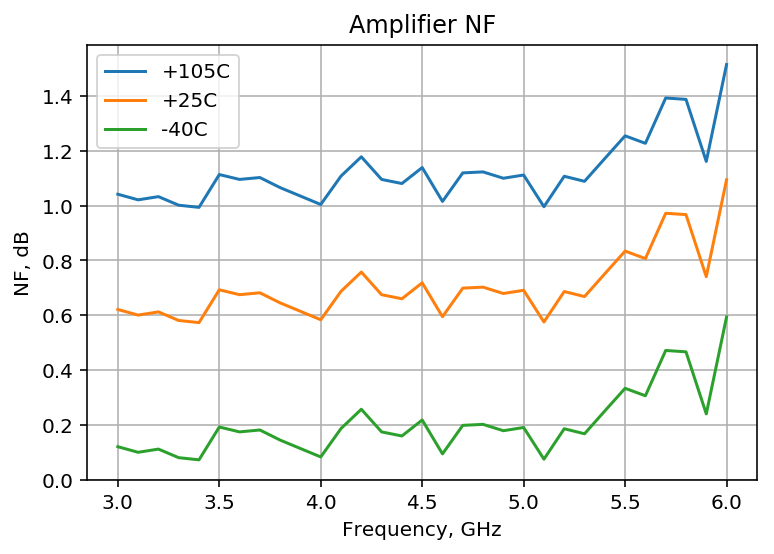

In [20]:
# data from s-parameter file probably 25C, other temperatures are just the same data with offset
freq = np.array([3.0E9,3.1E9,3.2E9,3.3E9,3.4E9,3.5E9,3.6E9,3.7E9,3.8E9,4.0E9,
    4.1E9,4.2E9,4.3E9,4.4E9,4.5E9,4.6E9,4.7E9,4.8E9,4.9E9,5.0E9,
    5.1E9,5.2E9,5.3E9,5.4E9,5.5E9,5.6E9,5.7E9,5.8E9,5.9E9,6.0E9])/1e9

NF_25C = np.array([0.62117,0.60071,0.61241,0.58115,0.57328,0.69285,0.67512,
    0.68201,0.64520,0.58376,0.68741,0.75754,0.67507,0.66019,0.71840,0.59498,
    0.69893,0.70252,0.67940,0.69113,0.57564,0.68660,0.66821,0.75142,0.83396,
    0.80669,0.97181,0.96686,0.74074,1.09395])

NF_N40C = NF_25C - .5
NF_105C = NF_25C + .42

plt.plot(freq,NF_105C,'-',label='+105C')
plt.plot(freq,NF_25C,'-',label='+25C')
plt.plot(freq,NF_N40C,'-',label='-40C')

plt.grid()
plt.legend()
plt.title('Amplifier NF')
plt.xlabel('Frequency, GHz')
plt.ylabel('NF, dB')

plt.show()

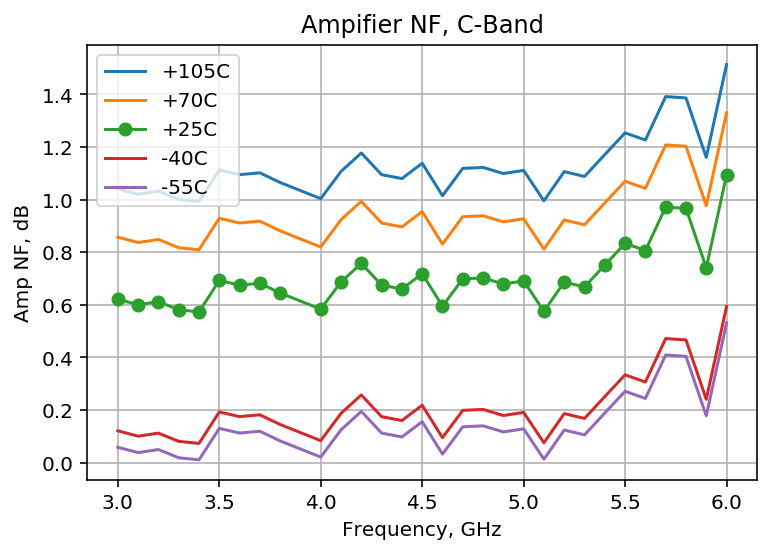

In [21]:
# interpolate to find NF at 70C
t25 = np.ones(len(NF_25C))*25
t105 = np.ones(len(NF_25C))*105
NF_70C = np.ones(len(NF_25C))

for k in range(len(t25)):
    NF_70C[k] = np.interp(70,[t25[k],t105[k]],[NF_25C[k],NF_105C[k]])

# extrapolate for -55
tN40 = np.ones(len(NF_25C))*(-40)
NF_N55C = np.ones(len(NF_25C))

for k in range(len(t25)):
    p = np.polyfit([tN40[k],t25[k],t105[k]],[NF_N40C[k],NF_25C[k],NF_105C[k]], 1)
    NF_N55C[k] = np.polyval(p, -55)

# plot NF data
plt.plot(freq,NF_105C,'-',label='+105C')
plt.plot(freq,NF_70C,'-',label='+70C')
plt.plot(freq,NF_25C,'-o',label='+25C')
plt.plot(freq,NF_N40C,'-',label='-40C')
plt.plot(freq,NF_N55C,'-',label='-55C')

plt.grid()
plt.legend()
plt.title('Ampifier NF, C-Band')
plt.xlabel('Frequency, GHz')
plt.ylabel('Amp NF, dB')

plt.show()

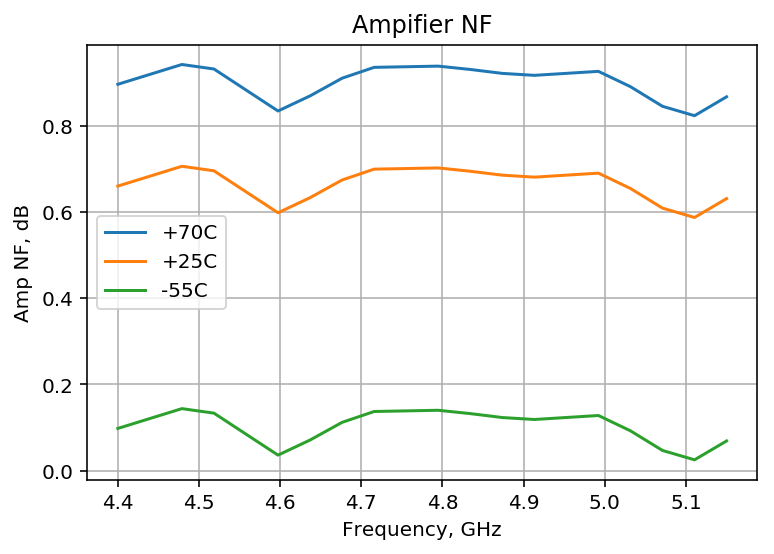

In [22]:
# linearly interpolate to get more data points across C-Band
#freq = np.linspace(1,7,20,endpoint=True)
x = np.linspace(4.400,5.150,20,endpoint=True)

y_25C = np.interp(x,freq,NF_25C)
y_N55C = np.interp(x,freq,NF_N55C)
y_70C = np.interp(x,freq,NF_70C)

# plot the new gain curves
plt.plot(x,y_70C,'-',label='+70C')
plt.plot(x,y_25C,'-',label='+25C')
plt.plot(x,y_N55C,'-',label='-55C')

plt.grid()
plt.legend()
plt.title('Ampifier NF')
plt.xlabel('Frequency, GHz')
plt.ylabel('Amp NF, dB')

plt.show()

In [23]:
print('average NF across C-Band at 70C = {:f} dB'.format(y_70C.mean()))
print('average NF across C-Band at 25C = {:f} dB'.format(y_25C.mean()))
print('average NF across C-Band at -55C = {:f} dB'.format(y_N55C.mean()))

average NF across C-Band at 70C = 0.902233 dB
average NF across C-Band at 25C = 0.665983 dB
average NF across C-Band at -55C = 0.103534 dB


# Qorvo QPC6324
Absorptive, High Isolation SPDT Switch  
5 MHz to 6000 MHz Operation   

**Absolute Maximum Ratings**  
Storage Temperature -50 to 150 °C  
VDD +6 V  
Pin max (RFC-RFX), CW, 50 Ω 37 dBm  
Pin max (RFX-TERM), CW, 50 Ω 31 dBm  



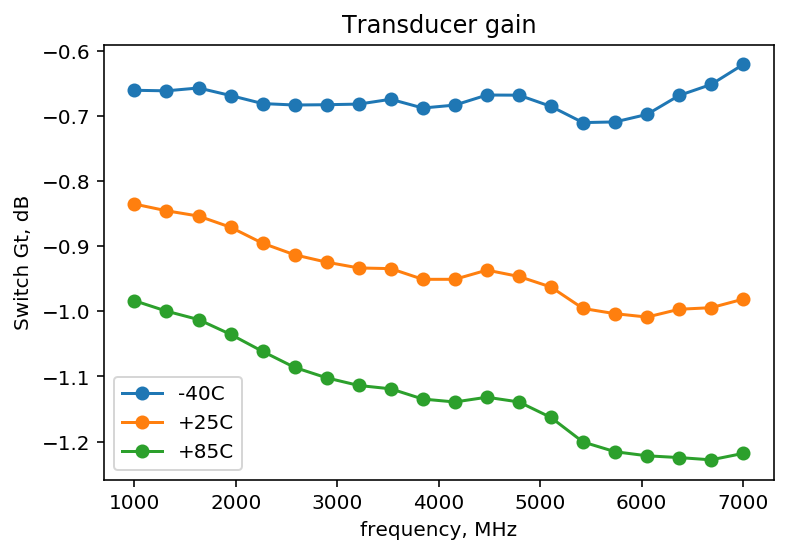

In [24]:
# where did this data come from?  maybe from s-paramters, need to document source
switch_25_d31_Gt_dB = np.array([-0.83532559, -0.84565013, -0.85375723, -0.87094433, -0.89550173,
       -0.91326263, -0.92457359, -0.93344024, -0.93446566, -0.95090483,
       -0.95087309, -0.93674126, -0.94651   , -0.96275591, -0.99563019,
       -1.00366366, -1.00882862, -0.9968527 , -0.99444312, -0.98132907])
switch_N40_d31_Gt_dB = np.array([-0.66065032, -0.66148716, -0.65710222, -0.66868611, -0.68105236,
       -0.68326319, -0.68279506, -0.68187348, -0.67444239, -0.68788108,
       -0.68338601, -0.66793551, -0.66816047, -0.68539595, -0.71026307,
       -0.7092264 , -0.69767135, -0.6685926 , -0.6517292 , -0.62104619])
switch_85_d31_Gt_dB = np.array([-0.98374723, -0.99976229, -1.01269183, -1.03539687, -1.0615825 ,
       -1.08615108, -1.1021799 , -1.11385916, -1.11902133, -1.1347391 ,
       -1.13920375, -1.13190176, -1.13918661, -1.16301407, -1.20062584,
       -1.21557441, -1.22184078, -1.22458353, -1.22803707, -1.2181576 ])

freq = np.linspace(1000,7000,20,endpoint=True)

plt.plot(freq,switch_N40_d31_Gt_dB,'-o',label='-40C')
plt.plot(freq,switch_25_d31_Gt_dB,'-o',label='+25C')
plt.plot(freq,switch_85_d31_Gt_dB,'-o',label='+85C')

plt.grid()
plt.legend()
plt.xlabel('frequency, MHz')
plt.ylabel('Switch Gt, dB')

plt.title('Transducer gain')
plt.grid()
plt.show()

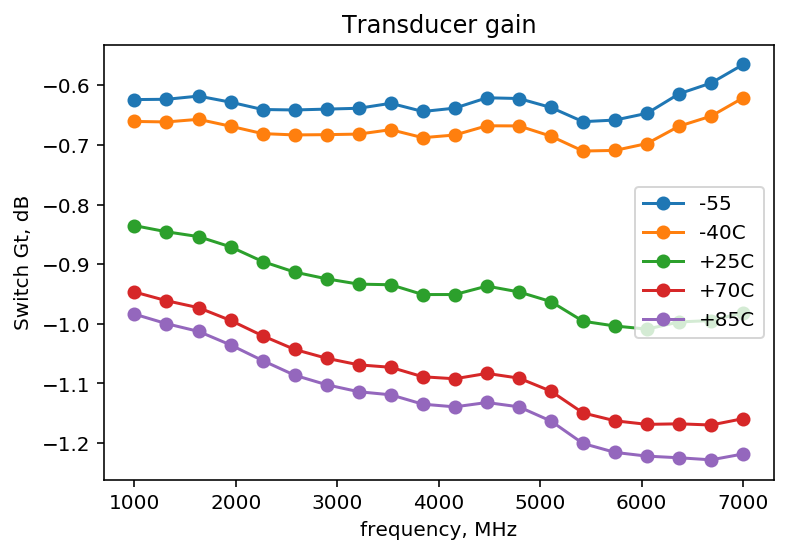

In [25]:
# interpolate to find insertion loss at 70C
t25 = np.ones(len(switch_25_d31_Gt_dB))*25
t85 = np.ones(len(switch_85_d31_Gt_dB))*85
switch_70_d31_Gt_dB = np.ones(len(switch_25_d31_Gt_dB))

for k in range(len(t25)):
    switch_70_d31_Gt_dB[k] = np.interp(70,[t25[k],t85[k]],[switch_25_d31_Gt_dB[k],switch_85_d31_Gt_dB[k]])

# extrapolate for -55C
tN40 = np.ones(len(y_25C))*(-40)
switch_N55_d31_Gt_dB = np.ones(len(switch_25_d31_Gt_dB))

for k in range(len(t25)):
    p = np.polyfit([tN40[k],t25[k],t85[k]],[switch_N40_d31_Gt_dB[k],switch_25_d31_Gt_dB[k],switch_85_d31_Gt_dB[k]], 1)
    switch_N55_d31_Gt_dB[k] = np.polyval(p, -55)

# plot data
plt.plot(freq,switch_N55_d31_Gt_dB,'-o',label='-55')
plt.plot(freq,switch_N40_d31_Gt_dB,'-o',label='-40C')
plt.plot(freq,switch_25_d31_Gt_dB,'-o',label='+25C')
plt.plot(freq,switch_70_d31_Gt_dB,'-o',label='+70C')
plt.plot(freq,switch_85_d31_Gt_dB,'-o',label='+85C')

plt.grid()
plt.legend()
plt.xlabel('frequency, MHz')
plt.ylabel('Switch Gt, dB')

plt.title('Transducer gain')
plt.grid()
plt.show()

## C Band

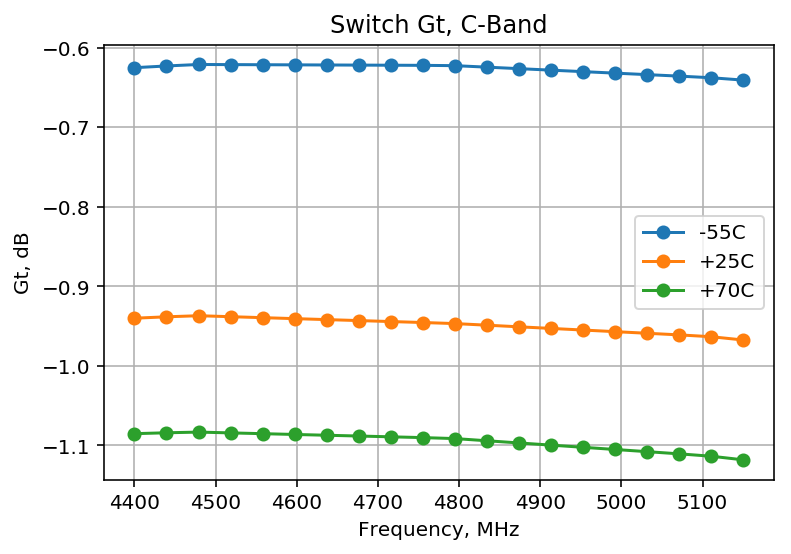

average switch Gt at -55C = -0.626547
average switch Gt at 25C = -0.948478
average switch Gt at 70C = -1.095121


In [26]:
# C-Band: 4400 to 4940 MHz and 5091 to 5150 MHz
x = np.linspace(4400,5150,20,endpoint=True)
y_25C = np.interp(x,freq,switch_25_d31_Gt_dB)
y_N55C = np.interp(x,freq,switch_N55_d31_Gt_dB)
y_70C = np.interp(x,freq,switch_70_d31_Gt_dB)

plt.plot(x,y_N55C,'-o',label='-55C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_70C,'-o',label='+70C')

plt.grid()
plt.legend()
plt.title('Switch Gt, C-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Gt, dB')

plt.show()

print('average switch Gt at -55C = {:f}'.format(y_N55C.mean()))
print('average switch Gt at 25C = {:f}'.format(y_25C.mean()))
print('average switch Gt at 70C = {:f}'.format(y_70C.mean()))

## S Band

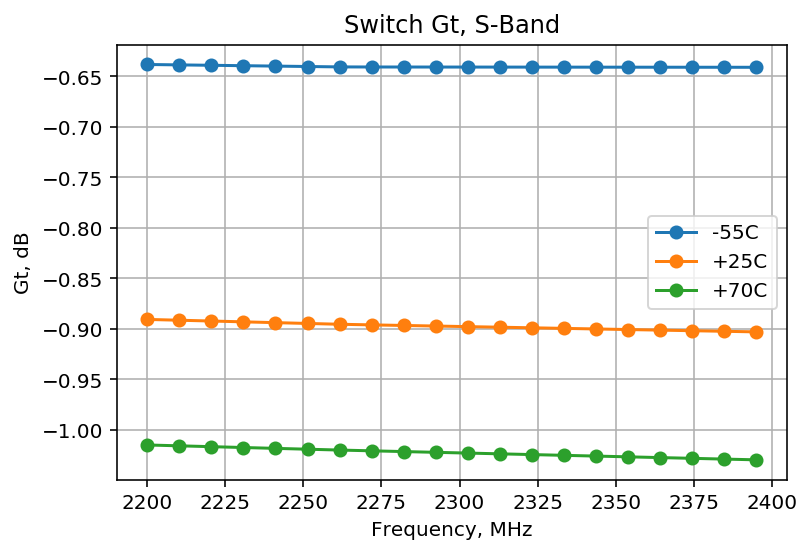

average switch Gt at -55C = -0.640307
average switch Gt at 25C = -0.897189
average switch Gt at 70C = -1.022445


In [27]:
# S-Band: 2200 to 2395 MHz
x = np.linspace(2200,2395,20,endpoint=True)
y_25C = np.interp(x,freq,switch_25_d31_Gt_dB)
y_N55C = np.interp(x,freq,switch_N55_d31_Gt_dB)
y_70C = np.interp(x,freq,switch_70_d31_Gt_dB)

plt.plot(x,y_N55C,'-o',label='-55C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_70C,'-o',label='+70C')

plt.grid()
plt.legend()
plt.title('Switch Gt, S-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Gt, dB')

plt.show()

print('average switch Gt at -55C = {:f}'.format(y_N55C.mean()))
print('average switch Gt at 25C = {:f}'.format(y_25C.mean()))
print('average switch Gt at 70C = {:f}'.format(y_70C.mean()))

## L Band

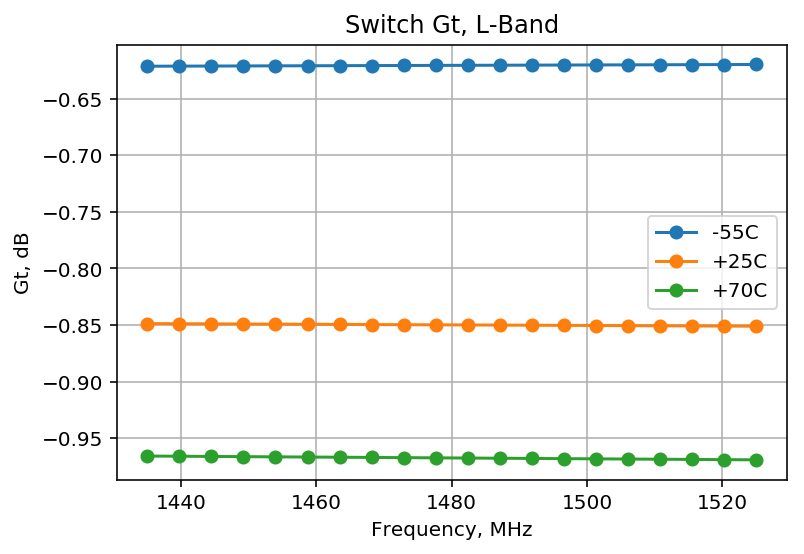

average switch Gt at -55C = -0.620723
average switch Gt at 25C = -0.849866
average switch Gt at 70C = -0.967331


In [28]:
# L-Band: 1435 to 1525 MHz
x = np.linspace(1435,1525,20,endpoint=True)
y_25C = np.interp(x,freq,switch_25_d31_Gt_dB)
y_N55C = np.interp(x,freq,switch_N55_d31_Gt_dB)
y_70C = np.interp(x,freq,switch_70_d31_Gt_dB)

plt.plot(x,y_N55C,'-o',label='-55C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_70C,'-o',label='+70C')

plt.grid()
plt.legend()
plt.title('Switch Gt, L-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Gt, dB')

plt.show()

print('average switch Gt at -55C = {:f}'.format(y_N55C.mean()))
print('average switch Gt at 25C = {:f}'.format(y_25C.mean()))
print('average switch Gt at 70C = {:f}'.format(y_70C.mean()))

# Qorvo TQP3M9037, Ultra Low-Noise, High Linearity LNA
0.7-6.0 GHz Operational Bandwidth  
Ultra Low Noise Figure, 0.4 dB NF at 1.95 GHz  
High Gain, 20 dB Gain at 1.95 GHz  
High Linearity, +35 dBm Output IP3  
High Input Power Ruggedness, +22 dBm CW  
+3V to +5V Supply; Does Not Require −Vgg  
Pin Compatible with Low-Band TQP3M9036  

**Absolute Maximum Ratings**  
Parameter Rating  
Storage Temperature −65 to 150°C  
Supply Voltage (VDD) +7 V  
RF Input Power, CW, 50Ω, T=25°C +22 dBm  

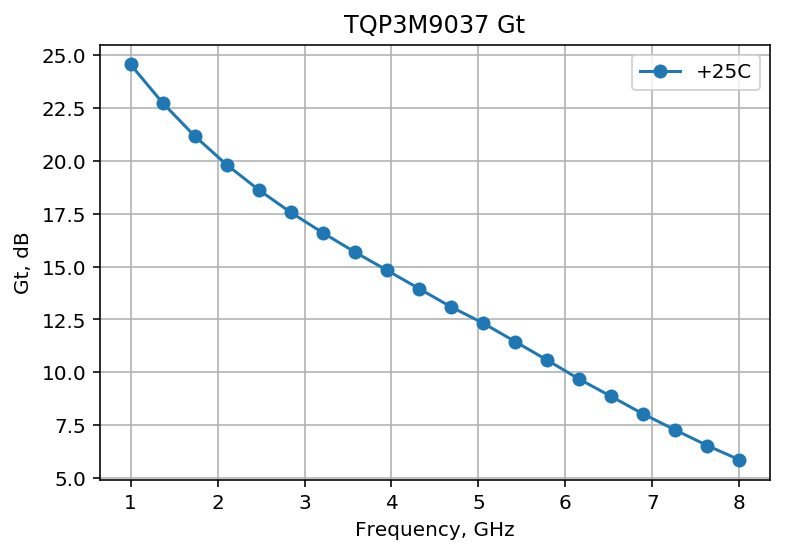

In [29]:
# s-parameters and NF from mfg data files
TQP3M9037_S21 = np.array([-4.49633778+16.29574217j,  0.28958017+13.70956627j,
        3.02340942+11.04310806j,  4.59659764 +8.64309434j,
        5.46959728 +6.5587485j ,  5.8821152  +4.73535918j,
        5.98308927 +3.1430653j ,  5.8259408  +1.75352332j,
        5.48240201 +0.56734309j,  4.96953236 -0.4232882j ,
        4.35398279 -1.19130379j,  3.71437116 -1.8120749j ,
        3.01995384 -2.20180059j,  2.35692319 -2.41992987j,
        1.74502618 -2.49604552j,  1.20093258 -2.49724955j,
        0.7278366  -2.41029724j,  0.31901031 -2.28604465j,
       -0.03514968 -2.12049082j, -0.34911158 -1.93041992j])
freq = np.linspace(1,8,20,endpoint=True)

# assume perfect match and calculate transducer gain
amp_gt_dB_25C = 10*np.log10(np.absolute(TQP3M9037_S21)**2)

plt.plot(freq,amp_gt_dB_25C,'-o',label='+25C')

plt.grid()
plt.legend()
plt.title('TQP3M9037 Gt')
plt.xlabel('Frequency, GHz')
plt.ylabel('Gt, dB')

plt.show()

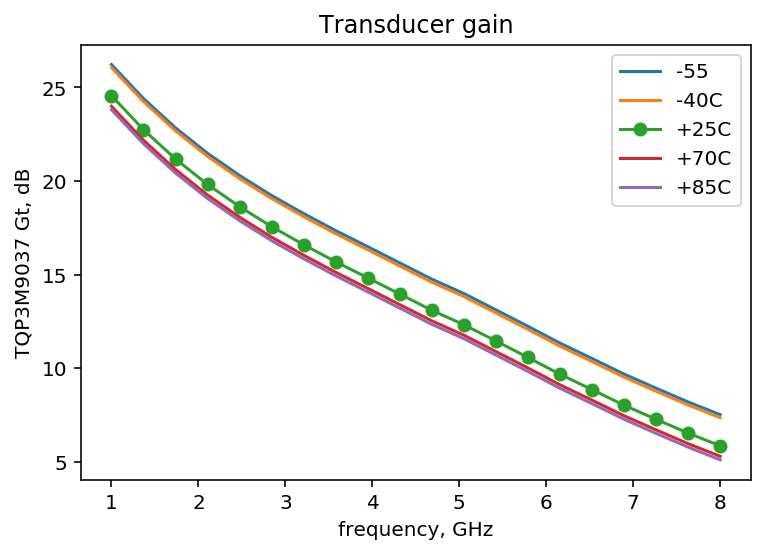

In [30]:
# estimate gains at +70C and -55C
# estimate Gt at 85C and -40C from figure in datasheet, just adjust up or down by small amount
amp_gt_dB_N40C = amp_gt_dB_25C + 1.5
amp_gt_dB_85C = amp_gt_dB_25C - 0.75

# interpolate to find insertion loss at 70C
t25 = np.ones(len(amp_gt_dB_25C))*25
t85 = np.ones(len(amp_gt_dB_25C))*85
amp_gt_dB_70C = np.ones(len(amp_gt_dB_25C))

for k in range(len(t25)):
    amp_gt_dB_70C[k] = np.interp(70,[t25[k],t85[k]],[amp_gt_dB_25C[k],amp_gt_dB_85C[k]])

# extrapolate for -55C
tN40 = np.ones(len(amp_gt_dB_25C))*(-40)
amp_gt_dB_N55C = np.ones(len(amp_gt_dB_25C))

for k in range(len(t25)):
    p = np.polyfit([tN40[k],t25[k],t85[k]],[amp_gt_dB_N40C[k],amp_gt_dB_25C[k],amp_gt_dB_85C[k]], 1)
    amp_gt_dB_N55C[k] = np.polyval(p, -55)

# plot data
plt.plot(freq,amp_gt_dB_N55C,'-',label='-55')
plt.plot(freq,amp_gt_dB_N40C,'-',label='-40C')
plt.plot(freq,amp_gt_dB_25C,'-o',label='+25C')
plt.plot(freq,amp_gt_dB_70C,'-',label='+70C')
plt.plot(freq,amp_gt_dB_85C,'-',label='+85C')

plt.grid()
plt.legend()
plt.xlabel('frequency, GHz')
plt.ylabel('TQP3M9037 Gt, dB')

plt.title('Transducer gain')
plt.grid()
plt.show()

## S Band Gt

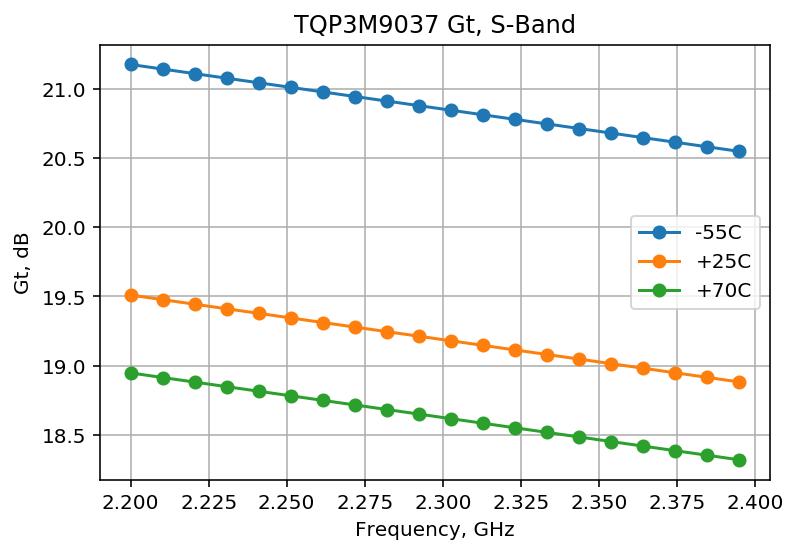

average amp Gt at -55C = 20.861866
average amp Gt at 25C = 19.196355
average amp Gt at 70C = 18.633855


In [31]:
# S-Band: 2200 to 2395 MHz
x = np.linspace(2.200,2.395,20,endpoint=True)
y_25C = np.interp(x,freq,amp_gt_dB_25C)
y_N55C = np.interp(x,freq,amp_gt_dB_N55C)
y_70C = np.interp(x,freq,amp_gt_dB_70C)

plt.plot(x,y_N55C,'-o',label='-55C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_70C,'-o',label='+70C')

plt.grid()
plt.legend()
plt.title('TQP3M9037 Gt, S-Band')
plt.xlabel('Frequency, GHz')
plt.ylabel('Gt, dB')

plt.show()

print('average amp Gt at -55C = {:f}'.format(y_N55C.mean()))
print('average amp Gt at 25C = {:f}'.format(y_25C.mean()))
print('average amp Gt at 70C = {:f}'.format(y_70C.mean()))

## L Band Gt

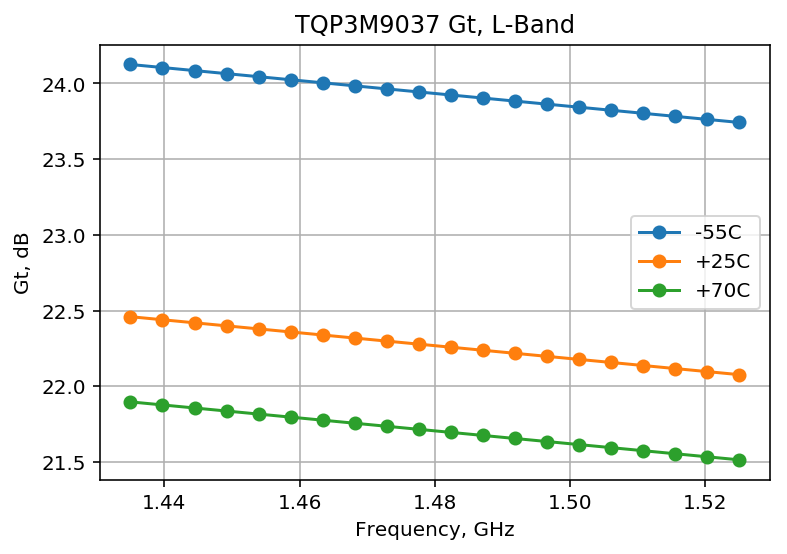

average amp Gt at -55C = 23.933445
average amp Gt at 25C = 22.267933
average amp Gt at 70C = 21.705433


In [32]:
# L-Band: 1435 to 1525 MHz
x = np.linspace(1.435,1.525,20,endpoint=True)
y_25C = np.interp(x,freq,amp_gt_dB_25C)
y_N55C = np.interp(x,freq,amp_gt_dB_N55C)
y_70C = np.interp(x,freq,amp_gt_dB_70C)

plt.plot(x,y_N55C,'-o',label='-55C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_70C,'-o',label='+70C')

plt.grid()
plt.legend()
plt.title('TQP3M9037 Gt, L-Band')
plt.xlabel('Frequency, GHz')
plt.ylabel('Gt, dB')

plt.show()

print('average amp Gt at -55C = {:f}'.format(y_N55C.mean()))
print('average amp Gt at 25C = {:f}'.format(y_25C.mean()))
print('average amp Gt at 70C = {:f}'.format(y_70C.mean()))

## TQP3M9037 NF

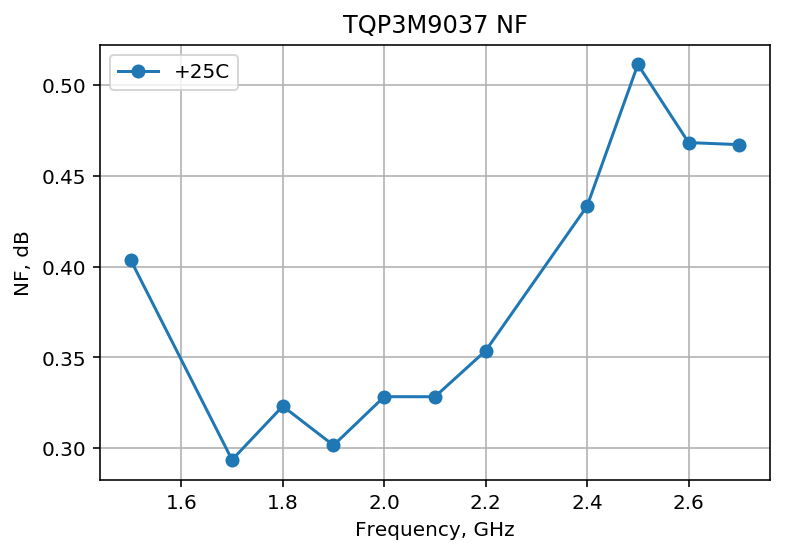

In [33]:
# data is from mfg s-parameter file
freq = np.array([1.5,1.7,1.8,1.9,2.0,2.1,2.2,2.4,2.5,2.6,2.7])
TQP3M9037_NF_dB_25C = np.array([0.40375,0.29354,0.32310,0.30155,0.32833,0.32831,
    0.35366,0.43336,0.51137,0.46835,0.46720])

plt.plot(freq,TQP3M9037_NF_dB_25C,'-o',label='+25C')

plt.grid()
plt.legend()
plt.title('TQP3M9037 NF')
plt.xlabel('Frequency, GHz')
plt.ylabel('NF, dB')

plt.show()

Figure in datasheet is plotted over the range 1.5 to 6 GHz.  The curve is also smooth, unlike the NF data in the s-parameter file.  
![NF plot](TQP3M9037_NF.png)  
Rather than estimating data points from the figure in the datasheet, going to use the NF data from the s-paramter file.

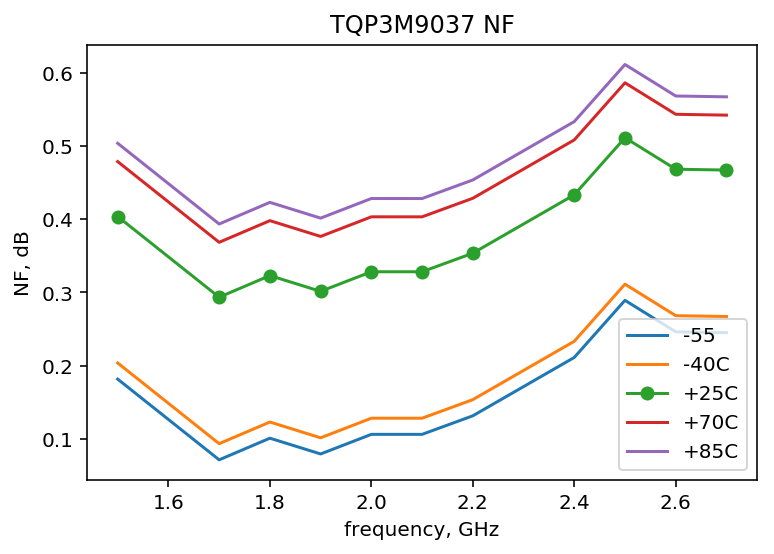

In [34]:
# estimate NFs at +70C and -55C
# estimate NF at 85C and -40C from figure in datasheet, just adjust up or down by small amount
TQP3M9037_NF_dB_85C = TQP3M9037_NF_dB_25C + 0.1
TQP3M9037_NF_dB_N40C = TQP3M9037_NF_dB_25C - 0.2

# interpolate to find insertion loss at 70C
t25 = np.ones(len(TQP3M9037_NF_dB_25C))*25
t85 = np.ones(len(TQP3M9037_NF_dB_25C))*85
TQP3M9037_NF_dB_70C = np.ones(len(TQP3M9037_NF_dB_25C))

for k in range(len(t25)):
    TQP3M9037_NF_dB_70C[k] = np.interp(70,[t25[k],t85[k]],[TQP3M9037_NF_dB_25C[k],TQP3M9037_NF_dB_85C[k]])

# extrapolate for -55C
tN40 = np.ones(len(TQP3M9037_NF_dB_25C))*(-40)
TQP3M9037_NF_dB_N55C = np.ones(len(TQP3M9037_NF_dB_25C))

for k in range(len(t25)):
    p = np.polyfit([tN40[k],t25[k],t85[k]],[TQP3M9037_NF_dB_N40C[k],TQP3M9037_NF_dB_25C[k],TQP3M9037_NF_dB_85C[k]], 1)
    TQP3M9037_NF_dB_N55C[k] = np.polyval(p, -55)

# plot data
plt.plot(freq,TQP3M9037_NF_dB_N55C,'-',label='-55')
plt.plot(freq,TQP3M9037_NF_dB_N40C,'-',label='-40C')
plt.plot(freq,TQP3M9037_NF_dB_25C,'-o',label='+25C')
plt.plot(freq,TQP3M9037_NF_dB_70C,'-',label='+70C')
plt.plot(freq,TQP3M9037_NF_dB_85C,'-',label='+85C')

plt.grid()
plt.legend()
plt.xlabel('frequency, GHz')
plt.ylabel('NF, dB')

plt.title('TQP3M9037 NF')
plt.grid()
plt.show()

## S Band NF

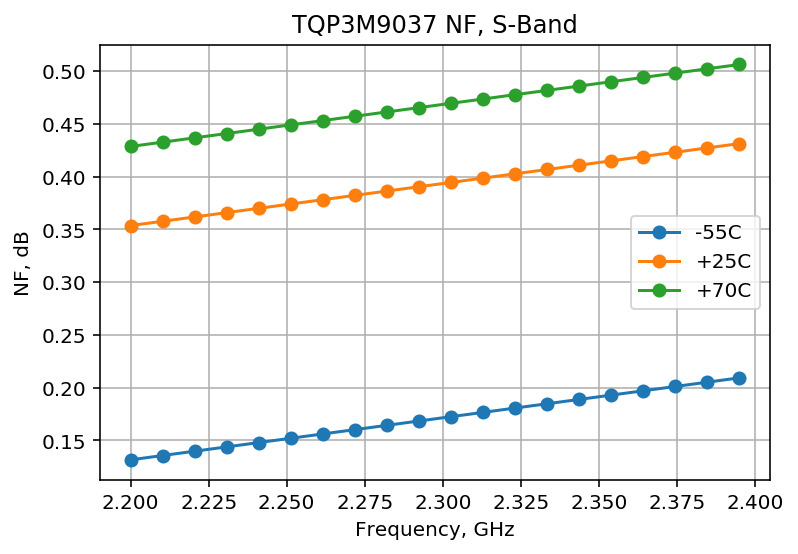

average amp NF at -55C = 0.170446
average amp NF at 25C = 0.392514
average amp NF at 70C = 0.467514


In [35]:
# S-Band: 2200 to 2395 MHz
x = np.linspace(2.200,2.395,20,endpoint=True)
y_25C = np.interp(x,freq,TQP3M9037_NF_dB_25C)
y_N55C = np.interp(x,freq,TQP3M9037_NF_dB_N55C)
y_70C = np.interp(x,freq,TQP3M9037_NF_dB_70C)

plt.plot(x,y_N55C,'-o',label='-55C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_70C,'-o',label='+70C')

plt.grid()
plt.legend()
plt.title('TQP3M9037 NF, S-Band')
plt.xlabel('Frequency, GHz')
plt.ylabel('NF, dB')

plt.show()

print('average amp NF at -55C = {:f}'.format(y_N55C.mean()))
print('average amp NF at 25C = {:f}'.format(y_25C.mean()))
print('average amp NF at 70C = {:f}'.format(y_70C.mean()))

## L Band NF

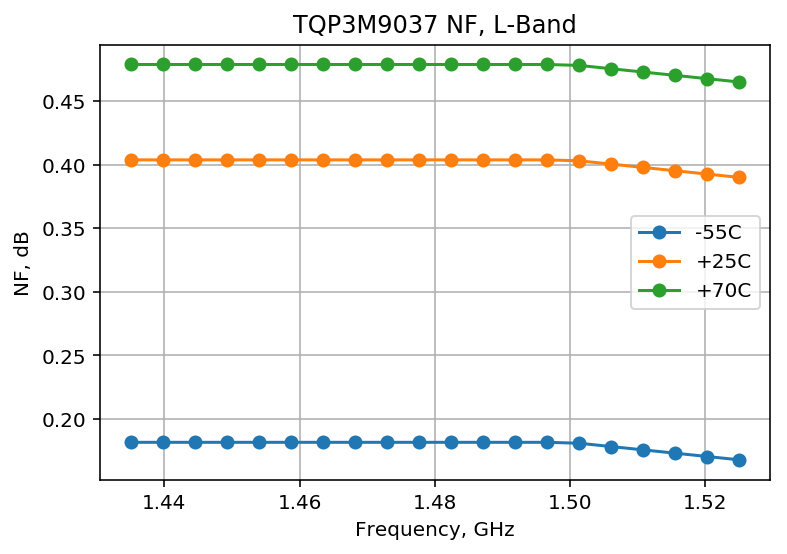

average amp NF at -55C = 0.179507
average amp NF at 25C = 0.401575
average amp NF at 70C = 0.476575


In [36]:
# L-Band: 1435 to 1525 MHz
x = np.linspace(1.435,1.525,20,endpoint=True)
y_25C = np.interp(x,freq,TQP3M9037_NF_dB_25C)
y_N55C = np.interp(x,freq,TQP3M9037_NF_dB_N55C)
y_70C = np.interp(x,freq,TQP3M9037_NF_dB_70C)

plt.plot(x,y_N55C,'-o',label='-55C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_70C,'-o',label='+70C')

plt.grid()
plt.legend()
plt.title('TQP3M9037 NF, L-Band')
plt.xlabel('Frequency, GHz')
plt.ylabel('NF, dB')

plt.show()

print('average amp NF at -55C = {:f}'.format(y_N55C.mean()))
print('average amp NF at 25C = {:f}'.format(y_25C.mean()))
print('average amp NF at 70C = {:f}'.format(y_70C.mean()))

# Minicircuits LFCN-2500+ Low Pass Filter
Features  
• excellent power handling, 10W  
• small size  
• 7 sections  
• temperature stable  

Maximum Ratings  
Operating Temperature -55°C to 100°C  
Storage Temperature -55°C to 100°C  
RF Power Input* 10W max. at 25°C  
* Passband rating, derate linearly to 3.5W at 100°C ambient.  
Permanent damage may occur if any of these limits are exceeded.  

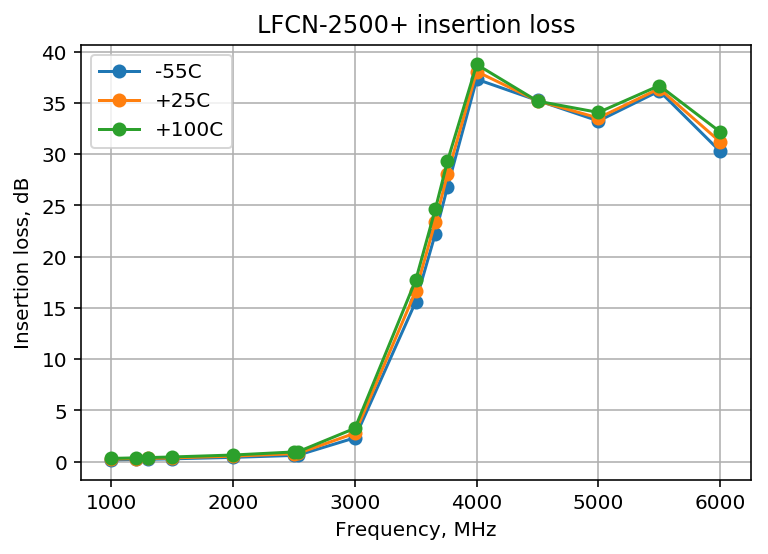

In [39]:
freq = np.array([1000,1200,1300,1500,2000,2500,2530,3000,
    3500,3660,3760,4000,4500,5000,5500,6000])

# insertion loss at various temperatures, -55C, 25C and 100C
LFCN2500_N55C = np.array([0.18,0.22,0.23,0.28,0.42,0.61,0.63,
    2.33,15.63,22.24,26.79,37.32,35.25,33.25,36.18,30.28])
LFCN2500_25C = np.array([0.26,0.30,0.32,0.37,0.54,0.78,0.80,2.78,16.67,
    23.42,28.04,38.07,35.21,33.54,36.41,31.21])
LFCN2500_100C = np.array([0.32,0.37,0.40,0.46,0.65,0.95,0.96,3.26,
    17.75,24.64,29.33,38.76,35.18,34.08,36.70,32.18])


plt.plot(freq,LFCN2500_N55C,'-o',label='-55C')
plt.plot(freq,LFCN2500_25C,'-o',label='+25C')
plt.plot(freq,LFCN2500_100C,'-o',label='+100C')

plt.grid()
plt.legend()
plt.title('LFCN-2500+ insertion loss')
plt.xlabel('Frequency, MHz')
plt.ylabel('Insertion loss, dB')

plt.show()

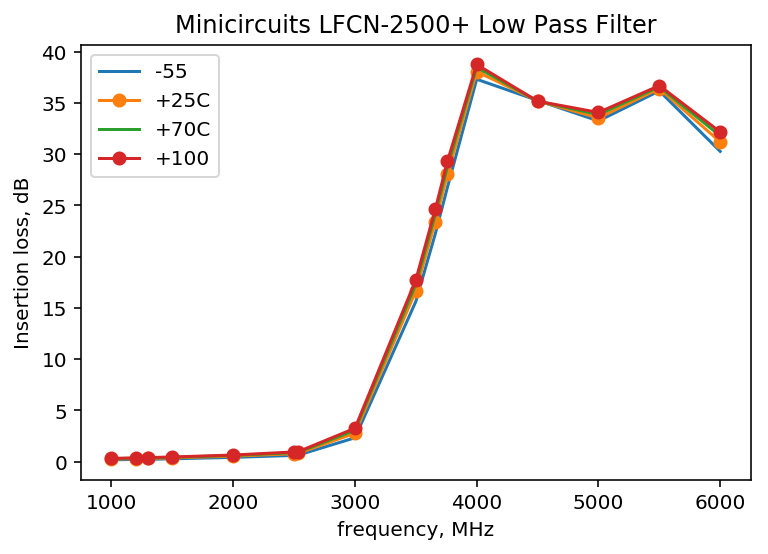

In [42]:
# interpolate to find insertion loss at 70C
t25 = np.ones(len(LFCN2500_25C))*25
t100 = np.ones(len(LFCN2500_25C))*100
LFCN2500_70C = np.ones(len(LFCN2500_25C))

for k in range(len(t25)):
    LFCN2500_70C[k] = np.interp(70,[t25[k],t100[k]],[LFCN2500_25C[k],LFCN2500_100C[k]])

# plot data
plt.plot(freq,LFCN2500_N55C,'-',label='-55')
plt.plot(freq,LFCN2500_25C,'-o',label='+25C')
plt.plot(freq,LFCN2500_70C,'-',label='+70C')
plt.plot(freq,LFCN2500_100C,'-o',label='+100')

plt.grid()
plt.legend()
plt.xlabel('frequency, MHz')
plt.ylabel('Insertion loss, dB')

plt.title('LFCN-2500+ Low Pass Filter')
plt.grid()
plt.show()

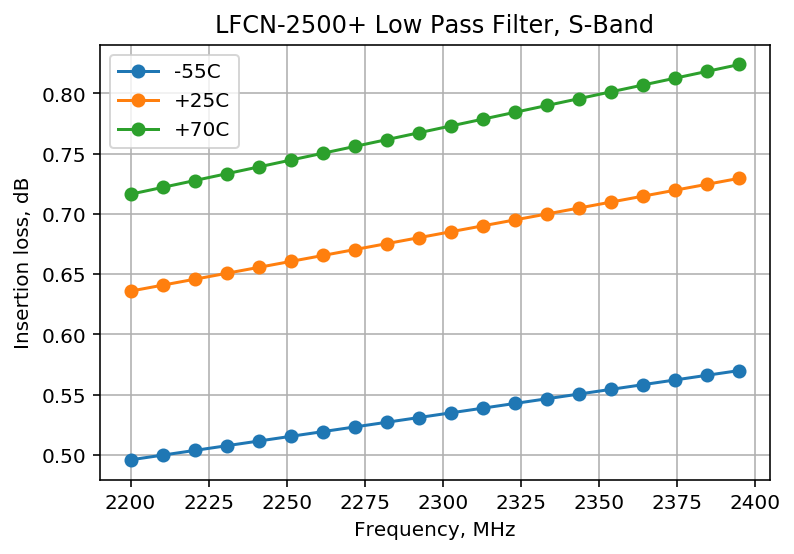

average amp IL at -55C = 0.533050
average amp IL at 25C = 0.682800
average amp IL at 70C = 0.770220


In [43]:
# S-Band: 2200 to 2395 MHz
x = np.linspace(2200,2395,20,endpoint=True)
y_25C = np.interp(x,freq,LFCN2500_25C)
y_N55C = np.interp(x,freq,LFCN2500_N55C)
y_70C = np.interp(x,freq,LFCN2500_70C)

plt.plot(x,y_N55C,'-o',label='-55C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_70C,'-o',label='+70C')

plt.grid()
plt.legend()
plt.title('LFCN-2500+ Low Pass Filter, S-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Insertion loss, dB')

plt.show()

print('average amp IL at -55C = {:f}'.format(y_N55C.mean()))
print('average amp IL at 25C = {:f}'.format(y_25C.mean()))
print('average amp IL at 70C = {:f}'.format(y_70C.mean()))

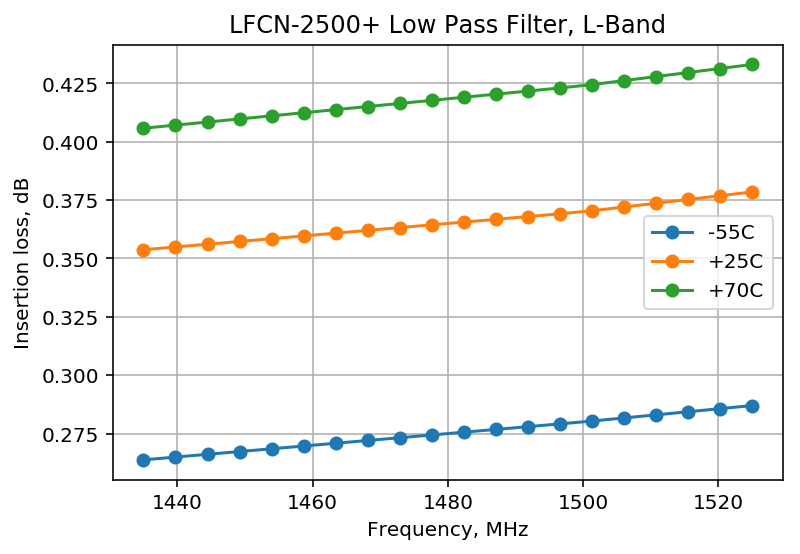

average amp IL at -55C = 0.275118
average amp IL at 25C = 0.365355
average amp IL at 70C = 0.418732


In [44]:
# L-Band: 1435 to 1525 MHz
x = np.linspace(1435,1525,20,endpoint=True)
y_25C = np.interp(x,freq,LFCN2500_25C)
y_N55C = np.interp(x,freq,LFCN2500_N55C)
y_70C = np.interp(x,freq,LFCN2500_70C)

plt.plot(x,y_N55C,'-o',label='-55C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_70C,'-o',label='+70C')

plt.grid()
plt.legend()
plt.title('LFCN-2500+ Low Pass Filter, L-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Insertion loss, dB')

plt.show()

print('average amp IL at -55C = {:f}'.format(y_N55C.mean()))
print('average amp IL at 25C = {:f}'.format(y_25C.mean()))
print('average amp IL at 70C = {:f}'.format(y_70C.mean()))

# Minicircuits LFCN-1700+ Low Pass Filter
Features  
• excellent power handling, 10W  
• small size  
• 7 sections  
• temperature stable  

  
Maximum Ratings  
Operating Temperature -55°C to 100°C   
Storage Temperature -55°C to 100°C  
RF Power Input(1) 10W max. at 25°C  
  
(1) Passband rating, derate linearly to 3.5W (35.4 dBm) at 100°C ambient.  
Permanent damage may occur if any of these limits are exceeded.  

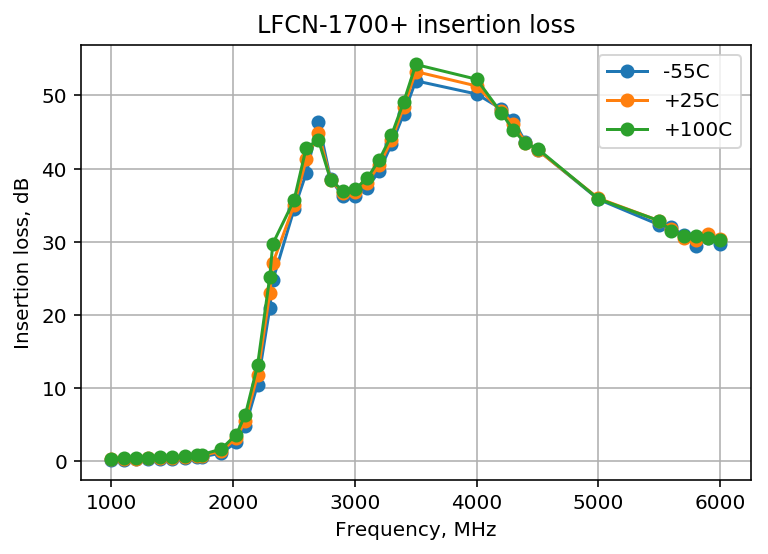

In [46]:
freq = np.array([1000,1100,1200,1300,1400,1500,1600,1700,1740,1900,2025,
    2100,2200,2300,2325,2500,2600,2700,2800,2900,3000,3100,
    3200,3300,3400,3500,4000,4200,4300,4400,4500,5000,5500,
    5600,5700,5800,5900,6000])

# insertion loss at various temperatures, -55C, 25C and 100C
LFCN1700_N55C = np.array([0.20,0.24,0.27,0.30,0.33,0.37,0.43,0.53,0.59,1.12,2.59,4.76,
    10.49,20.89,24.70,34.44,39.37,46.32,38.54,36.24,36.20,37.36,
    39.63,43.30,47.45,51.98,50.17,48.16,46.62,43.64,42.57,35.79,
    32.30,31.99,30.87,29.36,30.49,29.67])
LFCN1700_25C = np.array([0.29,0.33,0.36,0.41,0.44,0.50,0.57,0.70,0.76,1.40,3.12,5.57,
    11.80,22.93,27.05,35.00,41.23,44.89,38.47,36.61,36.73,38.07,
    40.48,43.85,48.37,53.24,51.27,47.81,46.10,43.55,42.52,35.93,
    32.85,31.67,30.49,30.24,31.01,30.36])
LFCN1700_100C = np.array([0.34,0.39,0.42,0.47,0.52,0.59,0.68,0.83,0.91,1.66,3.64,6.37,
    13.12,25.16,29.71,35.69,42.86,43.90,38.44,36.98,37.19,38.65,
    41.20,44.54,49.08,54.21,52.19,47.64,45.31,43.44,42.70,35.84,
    32.85,31.50,30.82,30.75,30.51,30.21])

plt.plot(freq,LFCN1700_N55C,'-o',label='-55C')
plt.plot(freq,LFCN1700_25C,'-o',label='+25C')
plt.plot(freq,LFCN1700_100C,'-o',label='+100C')

plt.grid()
plt.legend()
plt.title('LFCN-1700+ insertion loss')
plt.xlabel('Frequency, MHz')
plt.ylabel('Insertion loss, dB')

plt.show()

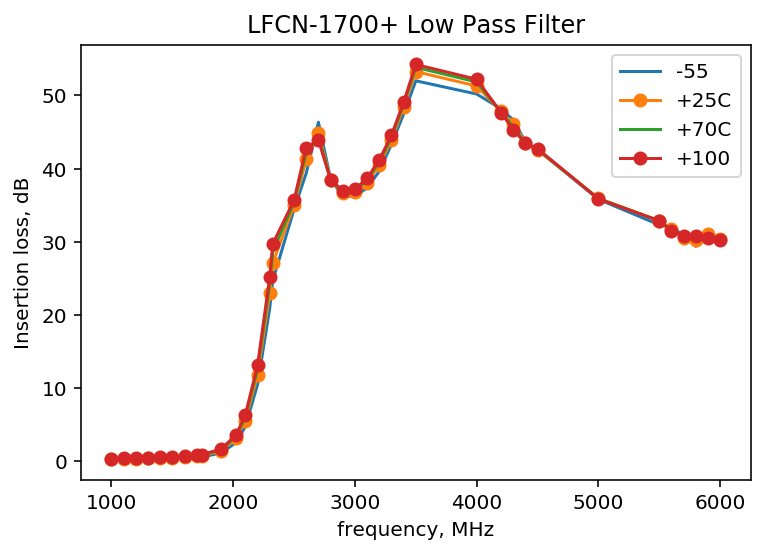

In [47]:
# interpolate to find insertion loss at 70C
t25 = np.ones(len(LFCN1700_25C))*25
t100 = np.ones(len(LFCN1700_25C))*100
LFCN1700_70C = np.ones(len(LFCN1700_25C))

for k in range(len(t25)):
    LFCN1700_70C[k] = np.interp(70,[t25[k],t100[k]],[LFCN1700_25C[k],LFCN1700_100C[k]])

# plot data
plt.plot(freq,LFCN1700_N55C,'-',label='-55')
plt.plot(freq,LFCN1700_25C,'-o',label='+25C')
plt.plot(freq,LFCN1700_70C,'-',label='+70C')
plt.plot(freq,LFCN1700_100C,'-o',label='+100')

plt.grid()
plt.legend()
plt.xlabel('frequency, MHz')
plt.ylabel('Insertion loss, dB')

plt.title('LFCN-1700+ Low Pass Filter')
plt.grid()
plt.show()

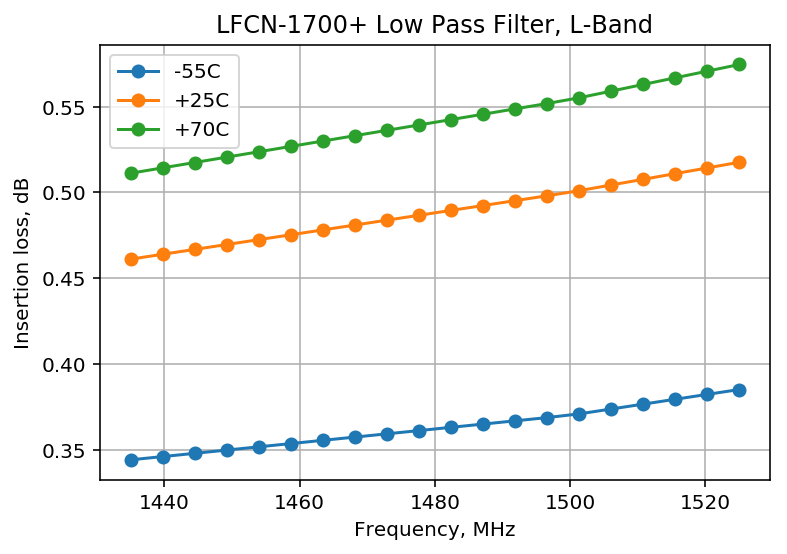

average amp IL at -55C = 0.362789
average amp IL at 25C = 0.488395
average amp IL at 70C = 0.541432


In [48]:
# L-Band: 1435 to 1525 MHz
x = np.linspace(1435,1525,20,endpoint=True)
y_25C = np.interp(x,freq,LFCN1700_25C)
y_N55C = np.interp(x,freq,LFCN1700_N55C)
y_70C = np.interp(x,freq,LFCN1700_70C)

plt.plot(x,y_N55C,'-o',label='-55C')
plt.plot(x,y_25C,'-o',label='+25C')
plt.plot(x,y_70C,'-o',label='+70C')

plt.grid()
plt.legend()
plt.title('LFCN-1700+ Low Pass Filter, L-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Insertion loss, dB')

plt.show()

print('average amp IL at -55C = {:f}'.format(y_N55C.mean()))
print('average amp IL at 25C = {:f}'.format(y_25C.mean()))
print('average amp IL at 70C = {:f}'.format(y_70C.mean()))

# Minicircuits LFCN-2400D+
Features  
• excellent power handling, 9W  
• small size  
• 5 sections  
• temperature stable  
  
Maximum Ratings  
Operating Temperature -55°C to 100°C  
Storage Temperature -55°C to 100°C  
RF Power Input (1) 9W max. at 25°C  
(1) Passband rating, derate linearly to 4W at 100°C ambient.  
Permanent damage may occur if any of these limits are exceeded  

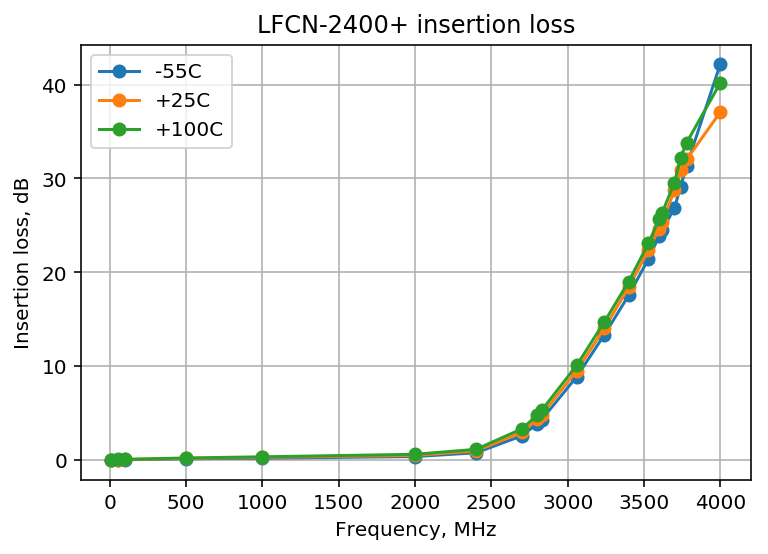

In [52]:
freq = np.array([10,50,100,500,1000,2000,2400,2700,2800,2830,
    3060,3240,3400,3530,3600,3620,3700,3740,3780,4000])

# insertion loss at various temperatures, -55C, 25C and 100C
LFCN2400_N55C = np.array([0.03,0.06,0.04,0.14,0.20,0.38,0.78,2.59,3.87,4.32,8.89,
    13.33,17.55,21.44,23.87,24.46,26.85,29.11,31.35,42.14])
LFCN2400_25C = np.array([0.03,0.06,0.07,0.18,0.29,0.50,0.98,2.97,4.33,4.83,9.52,
    14.02,18.40,22.36,24.65,25.32,28.73,30.91,32.02,37.05])
LFCN2400_100C = np.array([0.04,0.07,0.08,0.23,0.35,0.62,1.15,3.33,4.78,5.31,10.11,
14.70,19.01,23.11,25.67,26.37,29.54,32.21,33.81,40.16])

plt.plot(freq,LFCN2400_N55C,'-o',label='-55C')
plt.plot(freq,LFCN2400_25C,'-o',label='+25C')
plt.plot(freq,LFCN2400_100C,'-o',label='+100C')

plt.grid()
plt.legend()
plt.title('LFCN-2400+ insertion loss')
plt.xlabel('Frequency, MHz')
plt.ylabel('Insertion loss, dB')

plt.show()

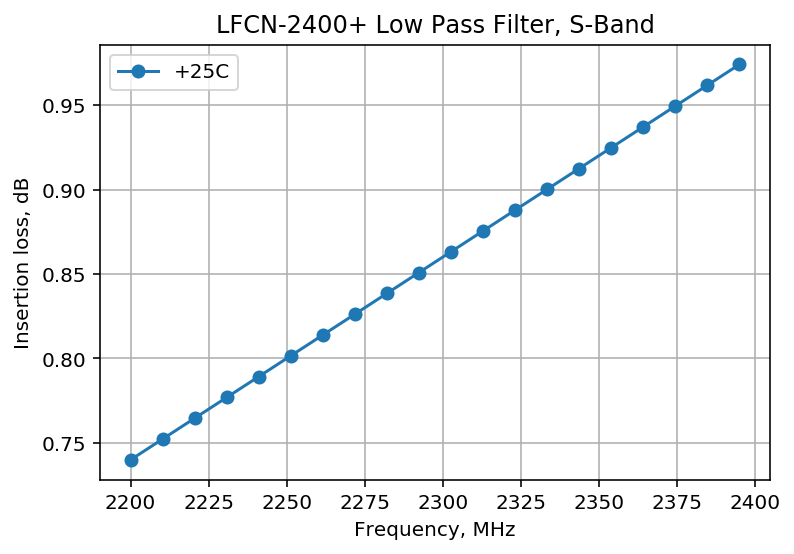

average amp IL at 25C = 0.857000


In [57]:
# S-Band: 2200 to 2395 MHz
x = np.linspace(2200,2395,20,endpoint=True)
y_25C = np.interp(x,freq,LFCN2400_25C)

plt.plot(x,y_25C,'-o',label='+25C')

plt.grid()
plt.legend()
plt.title('LFCN-2400+ Low Pass Filter, S-Band')
plt.xlabel('Frequency, MHz')
plt.ylabel('Insertion loss, dB')

plt.show()

print('average amp IL at 25C = {:f}'.format(y_25C.mean()))

# PGA-105+  
Ultra Flat Gain, Low Noise/High Dynamic Range  
Monolithic Amplifier  
0.04 to 2.6 GHz  

Absolute Maximum Ratings  
Parameter Ratings  
Operating Temperature (ground lead) -40°C to 85°C  
Storage Temperature -65°C to 150°C  
Operating Current at 5.0V 94 mA  
Power Dissipation 0.47 W  
Input Power (CW) 23 dBm (5 minutes max, 17 dBm (continuous)  
DC Voltage on Pin 3 5.5 V  
  
see data sheet for frequency, gain, OIP3, 1PdB, NF vs temp  

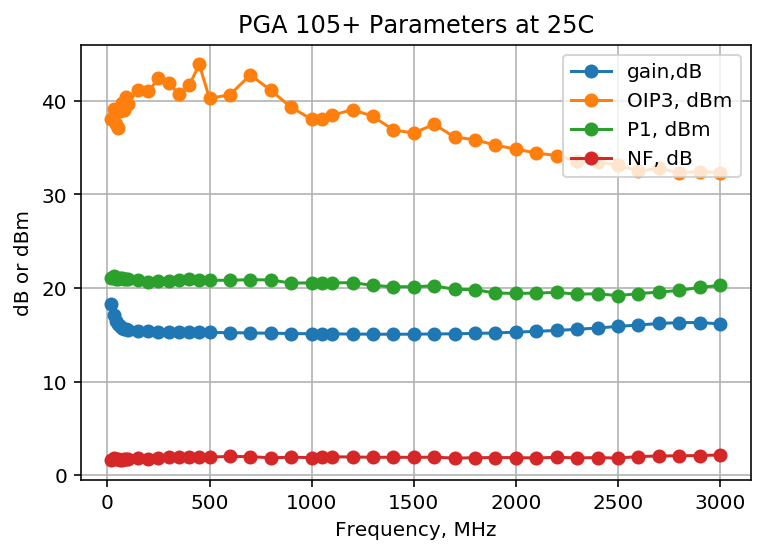

In [62]:
freq = np.array([20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,150.0,200.0,250.0,
    300.0,350.0,400.0,450.0,500.0,600.0,700.0,800.0,900.0,1000.0,1050.0,1100.0,
    1200.0,1300.0,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,
    2300.0,2400.0,2500.0,2600.0,2700.0,2800.0,2900.0,3000.0])
# gain dB at 25C
PGA105_gain_dB = np.array([18.31,17.09,16.48,16.14,15.89,15.76,15.66,15.60,15.55,
    15.43,15.37,15.34,15.32,15.30,15.29,15.27,15.25,15.23,15.20,15.17,15.14,15.11,
    15.10,15.10,15.08,15.07,15.06,15.07,15.09,15.11,15.15,15.20,15.29,15.37,15.47,
    15.59,15.73,15.90,16.05,16.21,16.31,16.31,16.17])
# OIP3 dBm at 25C
PGA105_OIP3_dBm = np.array([38.09,39.13,37.56,37.08,38.85,39.79,39.02,40.45,39.70,
    41.15,41.01,42.38,41.91,40.68,41.63,43.87,40.25,40.64,42.76,41.11,39.29,38.02,
    38.00,38.43,39.06,38.33,36.88,36.55,37.49,36.10,35.85,35.24,34.84,34.41,34.15,
    33.56,33.47,33.14,32.48,32.78,32.31,32.44,32.31])
# P1 dBm at 25C
PGA105_P1_dBm = np.array([21.11,21.33,20.97,20.91,21.12,21.12,20.96,20.95,20.93,
    20.90,20.62,20.75,20.72,20.87,20.91,20.87,20.82,20.83,20.89,20.86,20.52,20.56,
    20.54,20.55,20.57,20.28,20.13,20.14,20.23,19.86,19.82,19.46,19.42,19.46,19.53,
    19.34,19.39,19.18,19.41,19.56,19.74,20.07,20.28])
# NF dB at 25C
PGA105_NF_dB = np.array([1.67,1.80,1.70,1.70,1.65,1.66,1.79,1.74,1.74,1.80,1.73,1.88,
    1.90,1.94,1.90,1.95,1.95,2.01,1.99,1.87,1.93,1.89,1.92,1.97,1.96,1.92,1.93,1.91,
    1.94,1.83,1.88,1.89,1.89,1.85,1.92,1.86,1.89,1.84,2.00,2.06,2.08,2.11,2.17])

plt.plot(freq,PGA105_gain_dB,'-o',label='gain,dB')
plt.plot(freq,PGA105_OIP3_dBm,'-o',label='OIP3, dBm')
plt.plot(freq,PGA105_P1_dBm,'-o',label='P1, dBm')
plt.plot(freq,PGA105_NF_dB,'-o',label='NF, dB')

plt.grid()
plt.legend()
plt.title('PGA-105+ Parameters at 25C')
plt.xlabel('Frequency, MHz')
plt.ylabel('dB or dBm')

plt.show()

## S-Band

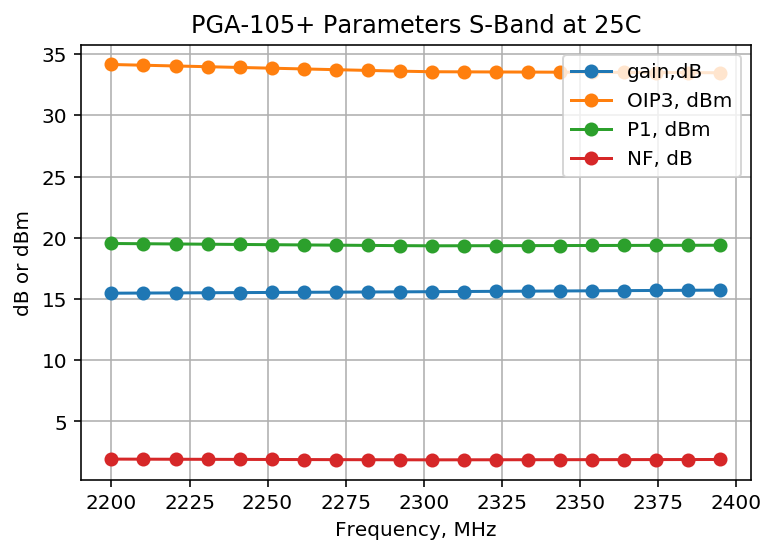

S-Band average gain at 25C = 15.591882
S-Band average OIP3 at 25C = 33.696789
S-Band average P1 at 25C = 19.403329
S-Band average NF at 25C = 1.883467


In [63]:
# S-Band: 2200 to 2395 MHz
x = np.linspace(2200,2395,20,endpoint=True)
y_gain = np.interp(x,freq,PGA105_gain_dB)
y_OIP3 = np.interp(x,freq,PGA105_OIP3_dBm)
y_P1 = np.interp(x,freq,PGA105_P1_dBm)
y_NF = np.interp(x,freq,PGA105_NF_dB)

plt.plot(x,y_gain,'-o',label='gain,dB')
plt.plot(x,y_OIP3,'-o',label='OIP3, dBm')
plt.plot(x,y_P1,'-o',label='P1, dBm')
plt.plot(x,y_NF,'-o',label='NF, dB')

plt.grid()
plt.legend()
plt.title('PGA-105+ Parameters S-Band at 25C')
plt.xlabel('Frequency, MHz')
plt.ylabel('dB or dBm')

plt.show()

print('S-Band average gain at 25C = {:f}'.format(y_gain.mean()))
print('S-Band average OIP3 at 25C = {:f}'.format(y_OIP3.mean()))
print('S-Band average P1 at 25C = {:f}'.format(y_P1.mean()))
print('S-Band average NF at 25C = {:f}'.format(y_NF.mean()))

## Base Band

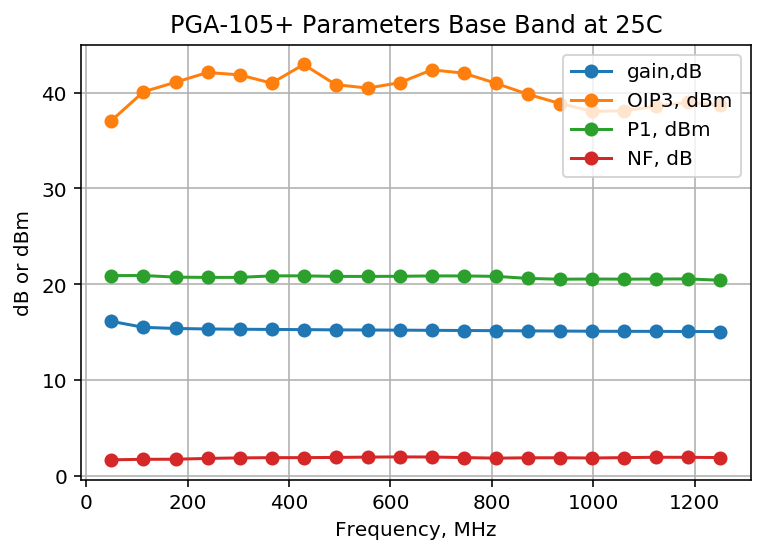

Base-Band average gain at 25C = 15.265789
Base-Band average OIP3 at 25C = 40.241224
Base-Band average P1 at 25C = 20.734408
Base-Band average NF at 25C = 1.904474


In [66]:
# Base band: 50 to 1250 MHz
x = np.linspace(50,1250,20,endpoint=True)
y_gain = np.interp(x,freq,PGA105_gain_dB)
y_OIP3 = np.interp(x,freq,PGA105_OIP3_dBm)
y_P1 = np.interp(x,freq,PGA105_P1_dBm)
y_NF = np.interp(x,freq,PGA105_NF_dB)

plt.plot(x,y_gain,'-o',label='gain,dB')
plt.plot(x,y_OIP3,'-o',label='OIP3, dBm')
plt.plot(x,y_P1,'-o',label='P1, dBm')
plt.plot(x,y_NF,'-o',label='NF, dB')

plt.grid()
plt.legend()
plt.title('PGA-105+ Parameters Base Band at 25C')
plt.xlabel('Frequency, MHz')
plt.ylabel('dB or dBm')

plt.show()

print('Base-Band average gain at 25C = {:f}'.format(y_gain.mean()))
print('Base-Band average OIP3 at 25C = {:f}'.format(y_OIP3.mean()))
print('Base-Band average P1 at 25C = {:f}'.format(y_P1.mean()))
print('Base-Band average NF at 25C = {:f}'.format(y_NF.mean()))

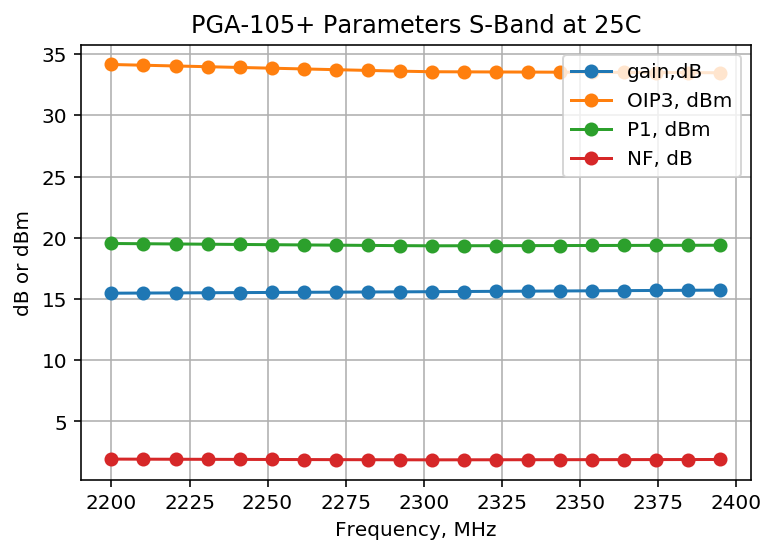

S-Band average gain at 25C = 15.591882
S-Band average OIP3 at 25C = 33.696789
S-Band average P1 at 25C = 19.403329
S-Band average NF at 25C = 1.883467


In [63]:
# S-Band: 2200 to 2395 MHz
x = np.linspace(2200,2395,20,endpoint=True)
y_gain = np.interp(x,freq,PGA105_gain_dB)
y_OIP3 = np.interp(x,freq,PGA105_OIP3_dBm)
y_P1 = np.interp(x,freq,PGA105_P1_dBm)
y_NF = np.interp(x,freq,PGA105_NF_dB)

plt.plot(x,y_gain,'-o',label='gain,dB')
plt.plot(x,y_OIP3,'-o',label='OIP3, dBm')
plt.plot(x,y_P1,'-o',label='P1, dBm')
plt.plot(x,y_NF,'-o',label='NF, dB')

plt.grid()
plt.legend()
plt.title('PGA-105+ Parameters S-Band at 25C')
plt.xlabel('Frequency, MHz')
plt.ylabel('dB or dBm')

plt.show()

print('S-Band average gain at 25C = {:f}'.format(y_gain.mean()))
print('S-Band average OIP3 at 25C = {:f}'.format(y_OIP3.mean()))
print('S-Band average P1 at 25C = {:f}'.format(y_P1.mean()))
print('S-Band average NF at 25C = {:f}'.format(y_NF.mean()))

## L-Band

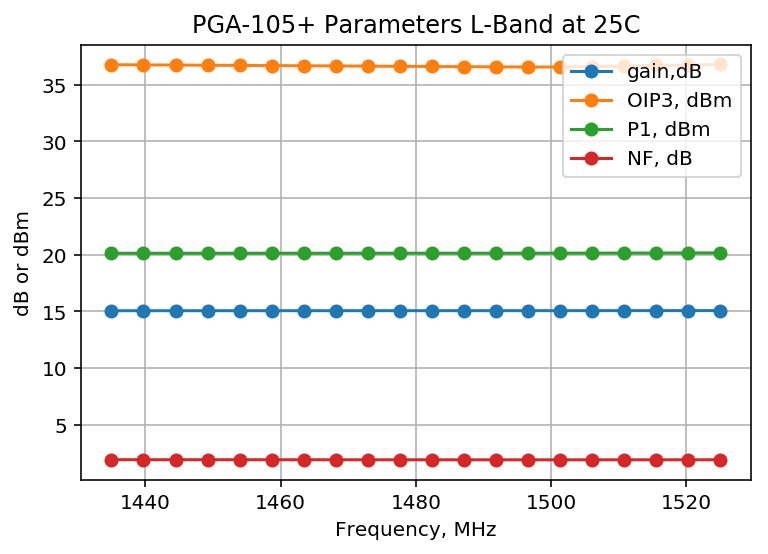

L-Band average gain at 25C = 15.068395
L-Band average OIP3 at 25C = 36.666132
L-Band average P1 at 25C = 20.141158
L-Band average NF at 25C = 1.915974


In [65]:
# L-Band: 1435 to 1525 MHz
x = np.linspace(1435,1525,20,endpoint=True)
y_gain = np.interp(x,freq,PGA105_gain_dB)
y_OIP3 = np.interp(x,freq,PGA105_OIP3_dBm)
y_P1 = np.interp(x,freq,PGA105_P1_dBm)
y_NF = np.interp(x,freq,PGA105_NF_dB)

plt.plot(x,y_gain,'-o',label='gain,dB')
plt.plot(x,y_OIP3,'-o',label='OIP3, dBm')
plt.plot(x,y_P1,'-o',label='P1, dBm')
plt.plot(x,y_NF,'-o',label='NF, dB')

plt.grid()
plt.legend()
plt.title('PGA-105+ Parameters L-Band at 25C')
plt.xlabel('Frequency, MHz')
plt.ylabel('dB or dBm')

plt.show()

print('L-Band average gain at 25C = {:f}'.format(y_gain.mean()))
print('L-Band average OIP3 at 25C = {:f}'.format(y_OIP3.mean()))
print('L-Band average P1 at 25C = {:f}'.format(y_P1.mean()))
print('L-Band average NF at 25C = {:f}'.format(y_NF.mean()))

# Minicircuits MAC-42
Frequency Mixer  
wide band  
Level 7 (LO Power+7 dBm) 1000 to 4200 MHz  
• wide bandwidth, 1000 to 4200 MHz  
• low conversion loss, 6.2 dB typ.    
• excellent L-R isolation, 35 dB typ  
  
  
Maximum Ratings  
Operating Temperature -55°C to 125°C  
Storage Temperature -65°C to 150°C  
RF Power 50 mW = 16.989 dBm  
IF Current 40 mA  
  
need RF, LO and IF freqs to determine conversion loss  
looks like mixer data is at 25C  
  
IF frequency: 272 to 1228 MHz  
LO frequency: 1855 to 3422  
RF frequency: L and S Band  
  
L_Band_LO = np.array([1855,2105,2355,2605])  
L-Band IF center frequencies: [  375.   625.   875.  1125.]  
start: 320  stop: 430 MHz  
start: 570  stop: 680 MHz  
start: 820  stop: 930 MHz  
start: 1070  stop: 1180 MHz  
gap: 140 MHz  
  
S_Band_LO = np.array([2672.5,2922.5,3172.5,3422.5])  
S-Band IF center frequencies: [  375.   625.   875.  1125.]  
start: 272  stop: 478 MHz  
start: 522  stop: 728 MHz  
start: 772  stop: 978 MHz  
start: 1022  stop: 1228 MHz  
gap: 45 MHz  

# Minicircuits XLF-112H+
Low Pass Filter  
50Ω DC to 1050 MHz 

Features  
Match to 50Ω in the stop band, eliminates undesired reflections  
• Cascadable  
• Good stopband rejection, 39 dB typ.  
• Temperature stable, up to 105°C  
  
Absolute Maximum Ratings  
Operating Temperature -55°C to +105°C  
Storage Temperature -65°C to +150°C  
RF Power Input, Passband (DC-F1)2 7.9W at 25°C  
RF Power Input, Stopband (F2-F5)3 1.58W at 25°C  
Passband rating derates linearly to 3.9W at 105°C ambient  
Stopband rating derates linearly to 0.75W at 105°C ambient  
Permanent damage may occur if any of these limits are exceeded.  
  
data sheet has insertin loss vs freq at 3 temps  
  
this filter is -3dB at 1.2 to 1.5 GHz, 
  
L-Band IF center frequencies: [  375.   625.   875.  1125.]  
start: 320  stop: 430 MHz  
start: 570  stop: 680 MHz  
start: 820  stop: 930 MHz  
start: 1070  stop: 1180 MHz  
gap: 140 MHz  
  
last IF seems to be in the transistion, what is the group delay in this area?  

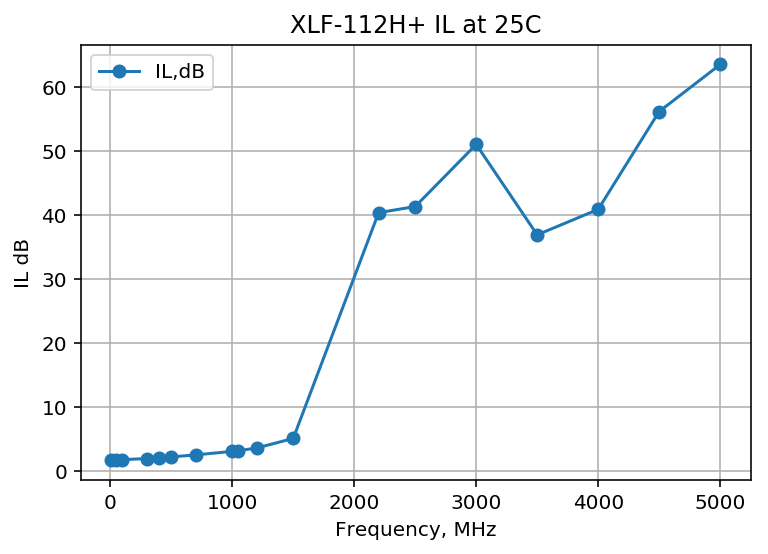

In [71]:
freq = np.array([10,50,100,300,400,500,700,1000,1050,1200,
    1500,2200,2500,3000,3500,4000,4500,5000])
XLF112H_IL_dB = np.array([1.75,1.77,1.78,1.95,2.07,2.21,2.52,3.07,
    3.18,3.59,5.09,40.33,41.29,50.98,36.87,40.85,56.12,63.46])

plt.plot(freq,XLF112H_IL_dB,'-o',label='IL,dB')

plt.grid()
plt.legend()
plt.title('XLF-112H+ IL at 25C')
plt.xlabel('Frequency, MHz')
plt.ylabel('IL dB')

plt.show()

In [72]:
# data extracted from s-parameter file 25C
XLF112H_s21 = np.array([ 8.43587316e-01-3.35288526e-02j,  8.40833612e-01-7.29495496e-02j,
        8.34578760e-01-1.18632154e-01j,  8.25853414e-01-1.65646733e-01j,
        8.14351641e-01-2.12239688e-01j,  8.00108421e-01-2.57868451e-01j,
        7.82988641e-01-3.02322893e-01j,  7.63453414e-01-3.45774474e-01j,
        7.41317430e-01-3.88020563e-01j,  7.16504607e-01-4.28704636e-01j,
        6.89477421e-01-4.67856979e-01j,  6.60355454e-01-5.05086807e-01j,
        6.29123927e-01-5.40771159e-01j,  5.95540323e-01-5.74167880e-01j,
        5.60202772e-01-6.05515637e-01j,  5.23204265e-01-6.34667034e-01j,
        4.84672538e-01-6.61508959e-01j,  4.44326426e-01-6.86078587e-01j,
        4.02945863e-01-7.08136646e-01j,  3.60302794e-01-7.27478999e-01j,
        3.16684532e-01-7.44539368e-01j,  2.72064769e-01-7.59030099e-01j,
        2.26636786e-01-7.70624068e-01j,  1.80762835e-01-7.79372428e-01j,
        1.34607469e-01-7.85775967e-01j,  8.77845971e-02-7.89407888e-01j,
        4.06990533e-02-7.89933714e-01j, -6.23905729e-03-7.87756159e-01j,
       -5.29125311e-02-7.82811071e-01j, -9.94073986e-02-7.75150515e-01j,
       -1.45415612e-01-7.64560075e-01j, -1.91002352e-01-7.50913904e-01j,
       -2.35743346e-01-7.34756026e-01j, -2.79626996e-01-7.15606351e-01j,
       -3.22588627e-01-6.93788980e-01j, -3.63845754e-01-6.68912162e-01j,
       -4.03783447e-01-6.41429723e-01j, -4.42284863e-01-6.11202834e-01j,
       -4.78960391e-01-5.78232111e-01j, -5.13895319e-01-5.42683373e-01j,
       -5.46259450e-01-5.04262476e-01j, -5.76134157e-01-4.63556398e-01j,
       -6.03452861e-01-4.20417677e-01j, -6.27732694e-01-3.74936888e-01j,
       -6.48836903e-01-3.27462091e-01j, -6.66481469e-01-2.77930370e-01j,
       -6.80512820e-01-2.26557302e-01j, -6.90604901e-01-1.73769334e-01j,
       -6.96568703e-01-1.19607899e-01j, -6.97898438e-01-6.46011725e-02j,
       -6.94922542e-01-9.14324386e-03j, -6.87044976e-01+4.67207543e-02j,
       -6.73884985e-01+1.02195796e-01j, -6.55530270e-01+1.57052245e-01j,
       -6.32204916e-01+2.10529731e-01j, -6.03318648e-01+2.62224979e-01j,
       -5.69363855e-01+3.11473529e-01j, -5.30039128e-01+3.57730007e-01j,
       -4.85477482e-01+4.00038167e-01j, -4.36113546e-01+4.37801792e-01j,
       -3.82356149e-01+4.70272061e-01j, -3.24479318e-01+4.96793672e-01j,
       -2.63633661e-01+5.16593925e-01j, -1.99922130e-01+5.28834624e-01j,
       -1.34491358e-01+5.33105113e-01j, -6.84924068e-02+5.28656389e-01j,
       -3.00083883e-03+5.15140641e-01j,  6.01450159e-02+4.92045171e-01j,
        1.19645222e-01+4.59801898e-01j,  1.73240785e-01+4.18334267e-01j,
        2.19281826e-01+3.68292768e-01j,  2.55745169e-01+3.11004393e-01j,
        2.80622531e-01+2.48447878e-01j,  2.92267946e-01+1.83119919e-01j,
        2.89788472e-01+1.18527473e-01j,  2.73613896e-01+5.83283853e-02j,
        2.44905168e-01+6.42957152e-03j,  2.06918644e-01-3.37769771e-02j,
        1.63815491e-01-5.99540703e-02j,  1.20635090e-01-7.18038584e-02j,
        8.21405469e-02-7.10954332e-02j,  5.20704356e-02-6.14718740e-02j,
        3.13334684e-02-4.75189279e-02j,  1.92308780e-02-3.33673266e-02j,
        1.32036574e-02-2.17022726e-02j,  1.05351404e-02-1.32799541e-02j,
        9.27300321e-03-7.57367418e-03j,  8.40323532e-03-3.74995100e-03j,
        7.56348990e-03-1.07903234e-03j,  6.75986183e-03+9.67545057e-04j,
        6.03352436e-03+2.60266394e-03j,  5.39156154e-03+3.92118229e-03j,
        4.87536181e-03+5.11129517e-03j,  4.55976928e-03+6.17337248e-03j,
        4.45053225e-03+7.04912511e-03j,  4.53771435e-03+7.69029028e-03j,
        4.83288055e-03+8.05883308e-03j,  5.27220999e-03+8.14222312e-03j,
        5.64959823e-03+7.91183564e-03j,  5.93245546e-03+7.38187029e-03j,
        6.02834359e-03+6.73589502e-03j,  6.00269589e-03+5.99194918e-03j,
        5.71097469e-03+5.17166414e-03j,  5.35524307e-03+4.46985280e-03j,
        4.89221155e-03+3.78637174e-03j,  4.35681291e-03+3.23606159e-03j,
        3.74849443e-03+2.76391642e-03j,  3.20926214e-03+2.34899313e-03j,
        2.68070217e-03+2.11731339e-03j,  2.21560781e-03+1.81167473e-03j,
        1.75513475e-03+1.57937315e-03j,  1.35630858e-03+1.36073824e-03j,
        9.88812340e-04+1.11943367e-03j,  6.15195367e-04+9.15486017e-04j,
        3.38643434e-04+6.07458433e-04j, -5.95425863e-05+2.94449409e-04j,
       -4.27822051e-04+2.63788541e-05j, -8.28790608e-04-3.42264792e-04j,
       -1.30283173e-03-7.22611496e-04j, -1.84593692e-03-1.02720431e-03j,
       -2.36376574e-03-1.36990976e-03j, -3.08908613e-03-1.66566759e-03j,
       -3.82098588e-03-1.89164622e-03j, -4.62911835e-03-2.06585412e-03j,
       -5.48343775e-03-2.07102121e-03j, -6.41386731e-03-2.00847589e-03j,
       -7.36622776e-03-1.80789403e-03j, -8.26393007e-03-1.44393079e-03j,
       -9.14272674e-03-9.78672305e-04j, -9.99535976e-03-3.41422473e-04j,
       -1.07665080e-02+4.07472457e-04j, -1.14307684e-02+1.27795306e-03j,
       -1.19803889e-02+2.31096499e-03j, -1.23722687e-02+3.36123080e-03j,
       -1.26229463e-02+4.50195957e-03j, -1.27327270e-02+5.70347658e-03j,
       -1.26105955e-02+6.85266641e-03j, -1.23758497e-02+8.04738920e-03j,
       -1.19719123e-02+9.17205939e-03j, -1.13927363e-02+1.02286973e-02j,
       -1.07247851e-02+1.12205956e-02j, -9.92294841e-03+1.21361895e-02j,
       -8.99624777e-03+1.29840719e-02j, -7.94920107e-03+1.36150822e-02j,
       -6.89277999e-03+1.40867511e-02j, -5.76999294e-03+1.45318869e-02j,
       -4.61768620e-03+1.47517337e-02j, -3.46918852e-03+1.48755414e-02j,
       -2.27438788e-03+1.48500325e-02j, -1.13859256e-03+1.46924808e-02j,
       -7.61544399e-05+1.44206362e-02j,  9.43134100e-04+1.40717875e-02j,
        1.90508304e-03+1.35496622e-02j,  2.81150575e-03+1.30068267e-02j,
        3.58748726e-03+1.23894645e-02j,  4.25785739e-03+1.16468321e-02j,
        4.91307137e-03+1.09089945e-02j,  5.39485078e-03+1.00983392e-02j,
        5.83087129e-03+9.27539096e-03j,  6.17661058e-03+8.48340376e-03j,
        6.37460237e-03+7.63969435e-03j,  6.56984332e-03+6.80602386e-03j,
        6.58796937e-03+6.05189116e-03j,  6.61277548e-03+5.30902744e-03j,
        6.53555597e-03+4.59521772e-03j,  6.39660125e-03+3.89015282e-03j,
        6.17877070e-03+3.27158780e-03j,  5.93675379e-03+2.72544390e-03j,
        5.66208935e-03+2.14597383e-03j,  5.34726525e-03+1.69029072e-03j,
        5.05035299e-03+1.25177195e-03j,  4.69451466e-03+8.54868092e-04j,
        4.31577448e-03+5.54280939e-04j,  3.97987247e-03+2.66299547e-04j,
        3.59914854e-03+4.30364614e-05j,  3.27066582e-03-1.43516025e-04j,
        2.91672655e-03-2.66236196e-04j,  2.57930649e-03-3.71790142e-04j,
        2.27076404e-03-4.16191231e-04j,  1.97504399e-03-4.59346900e-04j,
        1.69654347e-03-4.81279793e-04j,  1.46411929e-03-4.70352808e-04j,
        1.20002336e-03-4.09861891e-04j,  9.96512695e-04-3.79501407e-04j,
        7.91809591e-04-3.08262114e-04j,  6.75419953e-04-2.25493820e-04j,
        5.10135296e-04-1.69997904e-04j,  3.63862608e-04-9.25985211e-05j,
        2.77168894e-04-3.07126569e-05j,  1.52084450e-04+7.19246005e-05j,
        1.17928315e-04+1.23189252e-04j,  7.52523900e-05+2.13224200e-04j,
        2.60752511e-05+2.90134419e-04j, -1.04308698e-05+3.67116199e-04j,
       -7.68018292e-05+4.09652726e-04j, -8.37401758e-05+4.37513442e-04j,
       -1.07110832e-04+5.50022275e-04j, -8.58354430e-05+5.74839829e-04j,
       -1.36298532e-04+5.93061688e-04j, -8.84332019e-05+6.63426083e-04j])

For now assume that the input and output impediances are matched and reflections coefficients are, $\Gamma_L = \Gamma_S = 0$. So the transducer gain is:  
$G_t = |S_{21}|^2$  

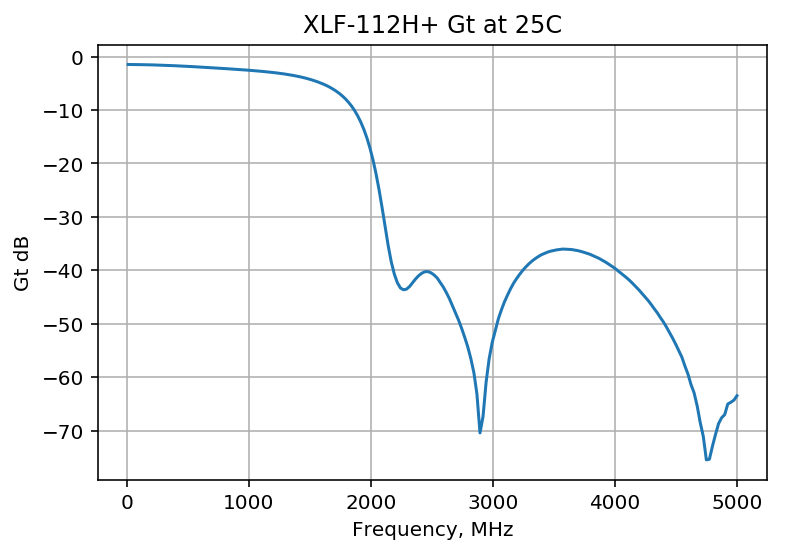

In [74]:
XLF112H_abs = np.absolute(XLF112H_s21)
XLF112H_gt_dB = 10*np.log10(XLF112H_abs**2)
f = np.linspace(10,5000,200,endpoint=True)

plt.plot(f,XLF112H_gt_dB,'-')

plt.grid()
plt.title('XLF-112H+ Gt at 25C')
plt.xlabel('Frequency, MHz')
plt.ylabel('Gt dB')

plt.show()

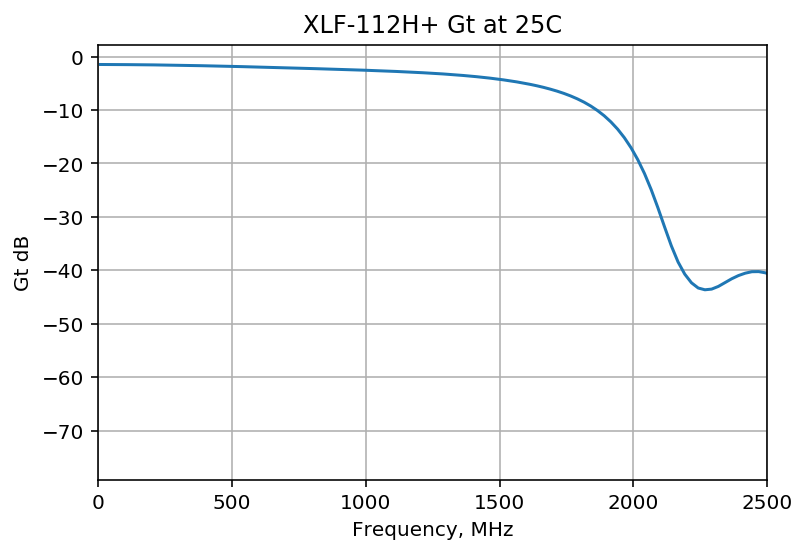

In [76]:
plt.plot(f,XLF112H_gt_dB,'-')

plt.grid()
plt.title('XLF-112H+ Gt at 25C')
plt.xlabel('Frequency, MHz')
plt.ylabel('Gt dB')
plt.xlim(0,2500)

plt.show()

In [77]:
S_Band_low = 2200
S_Band_high = 2395
S_Band_IF_bw = 205
S_Band_LO = np.array([2672.5,2922.5,3172.5,3422.5])

In [78]:
S_band_center = (S_Band_high + S_Band_low)/2
IF_center_freq = S_Band_LO - S_band_center
print('S-Band IF center frequencies:',IF_center_freq)
for i in IF_center_freq:
    print('start: {:.0f}  stop: {:.0f} MHz'.format(i-S_Band_IF_bw/2,i+S_Band_IF_bw/2))

gap = (IF_center_freq[1]-S_Band_IF_bw/2) - (IF_center_freq[0]+S_Band_IF_bw/2)
print('gap: {:.0f} MHz'.format(gap))

S-Band IF center frequencies: [  375.   625.   875.  1125.]
start: 272  stop: 478 MHz
start: 522  stop: 728 MHz
start: 772  stop: 978 MHz
start: 1022  stop: 1228 MHz
gap: 45 MHz


In [82]:
def S_band_IF(freq): # freq in MHz
    if (freq >= 272) and (freq <= 478):
        il = 0
    elif (freq >= 522) and (freq <= 728):
        il = 0
    elif (freq >= 772) and (freq <= 978):
        il = 0
    elif (freq >= 1022) and (freq <= 1228):
        il = 0
    else:
        il = -100
    return il

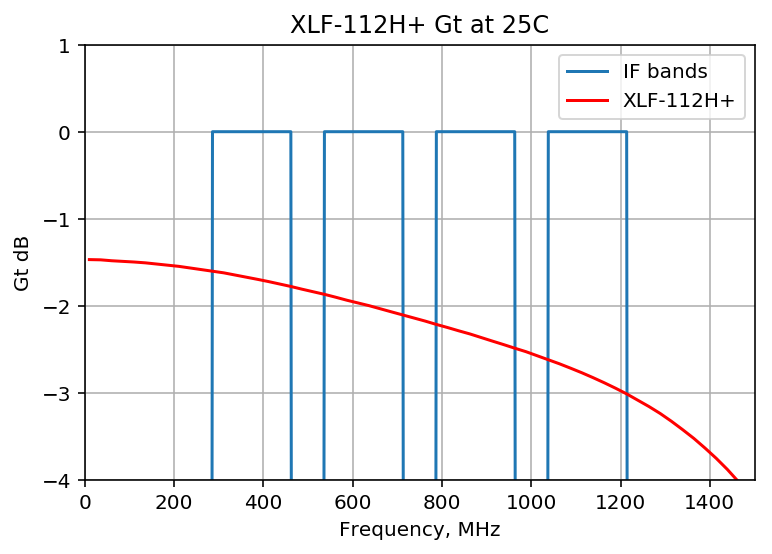

In [96]:
y_IF = np.ones(len(f))
k = 0
for i in f:
    y_IF[k] = S_band_IF(i)
    k += 1

plt.plot(f,y_IF,'-',label='IF bands')
plt.plot(f,XLF112H_gt_dB,'-r',label='XLF-112H+')

plt.grid()
plt.legend()
plt.title('XLF-112H+ Gt at 25C')
plt.xlabel('Frequency, MHz')
plt.ylabel('Gt dB')
plt.ylim(-4,1)
plt.xlim(0,1500)
plt.savefig('XLF-112H+ gain profile.png', format="png")
plt.show()

## Group delay calculations
Extract group delay from S21.  
One interesting plot is the S21 phase angle, after it is "unwound." The slope of this plot is the group delay. You can generally see were the group delay will not be flat, by any regions of non-linearity on the plot. From the plot you can expect funny things to happen to the group delay of this circuit starting just below 8 GHz...

Group Delay is defined as the negative derivative (or slope) of the phase response vs.
frequency. It is a measure of the relative delay at different frequencies from the input to the
output in a system. Group Delay, however, generally represents the relative delay vs.
frequency, with any processing, propagation, or other “all-pass” delay (sometimes referred
to as “excess phase”) removed from the calculation -- i.e., the frequency dependent delay(s)
corresponding to magnitude and phase variations in the frequency response. If this “allpass”
delay is not removed from the calculation, the Group Delay will indicate the
propagation delay through the system plus the frequency response dependent phase
derivative. Alternatively, the magnitude of the impulse response also reveals the delay in a
system directly in the time domain. In a bandpass, or band-limited system, the peak in the
impulse response magnitude generally represents the average group delay in the pass-band. 

Usually used as a measure of dispersion (or distortion).

Defined as the derivative of the unwrapped s-parameter phase (in rad) with respect to the frequency.

In [112]:
# convert Hz to degress per second
f_deg_per_sec = f*360

# calculate delta f
f_deg_per_sec = f*360
del_f = np.diff(f_deg_per_sec)

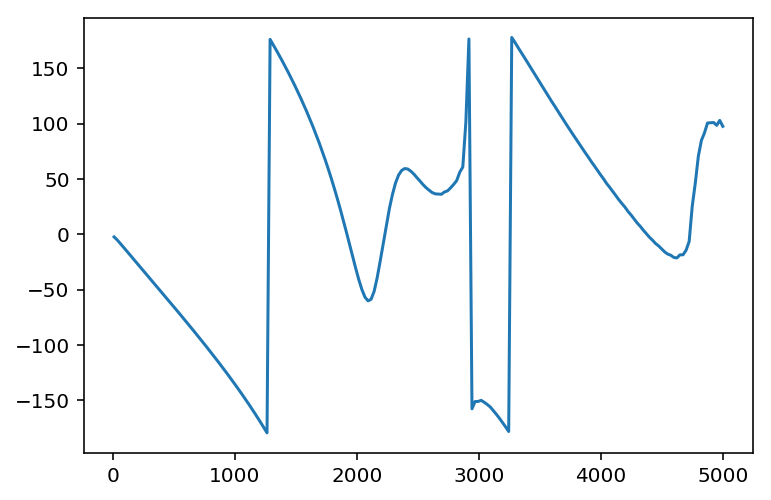

In [113]:
phase = np.angle(XLF112H_s21, deg=True)
plt.plot(f,phase)
plt.show()

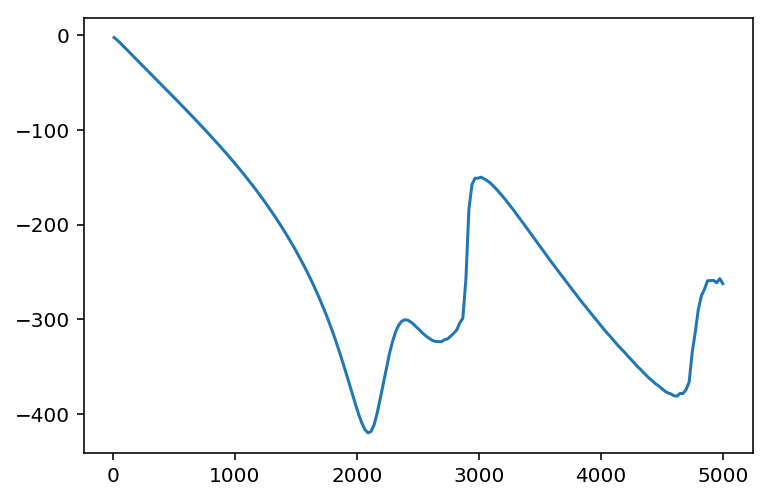

In [116]:
phase = np.angle(XLF112H_s21, deg=True)

# Unwrap phase
for i in range(2,len(f)):
    while phase[i] - phase[i-1] <= -180:
        phase[i] = phase(i) + 360
    while phase[i] - phase[i-1] >= 180:
        phase[i]= phase[i] - 360

plt.plot(f,phase)
plt.show()

In [117]:
# calculate delta phase
del_phase = np.diff(phase)

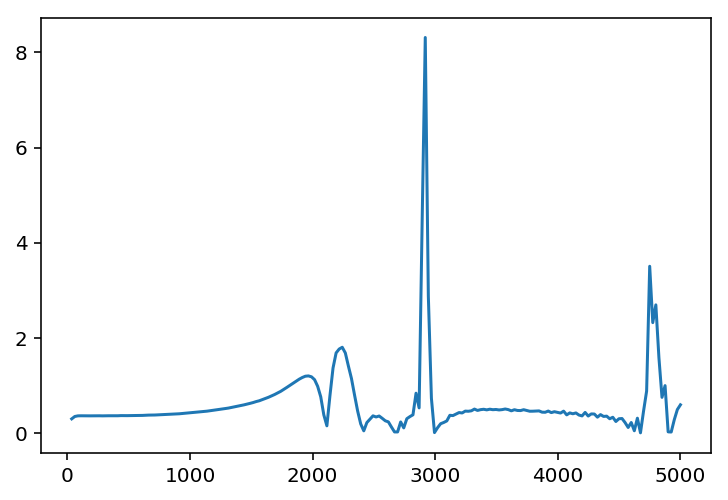

In [134]:
gd = np.abs(del_phase/del_f)*1000 # in ns
plt.plot(f[1:],gd)
plt.show()

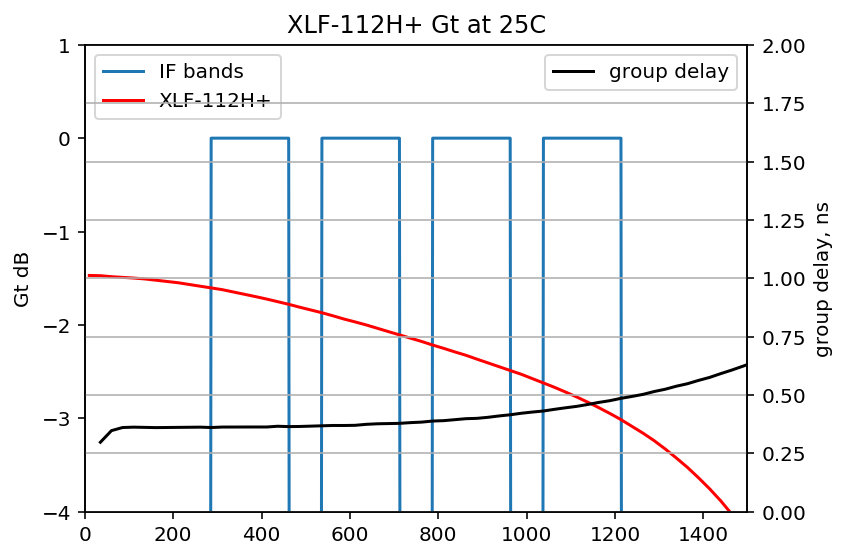

In [162]:
fig, ax1 = plt.subplots()

line1, =ax1.plot(f,y_IF,'-')
line2, = ax1.plot(f,XLF112H_gt_dB,'-r')
ax1.set_ylabel('Gt dB')
ax1.set_ylim(-4,1)
#ax1.legend(handles=[line1,line2])
ax1.legend((line1, line2), ('IF bands', 'XLF-112H+'),loc=2)

ax2 = ax1.twinx()
ax2.plot(f[1:],gd,'-k',label='group delay')
ax2.set_ylabel('group delay, ns')
ax2.set_ylim(0,2)
ax2.legend()

plt.grid()
#plt.legend()
plt.title('XLF-112H+ Gt at 25C')

plt.xlabel('Frequency, MHz')
plt.xlim(0,1500)

fig.tight_layout()
plt.savefig('XLF-112H+ gain profile.png', format="png")
plt.show()

In [153]:
# get amplitude difference at IF band edges
x = np.linspace(272,478,20,endpoint=True)
y_gain = np.interp(x,f,XLF112H_gt_dB)
print(y_gain[0]-y_gain[-1])

0.206903880205


In [154]:
# get amplitude difference at IF band edges
x = np.linspace(522,728,20,endpoint=True)
y_gain = np.interp(x,f,XLF112H_gt_dB)
print(y_gain[0]-y_gain[-1])

0.276304529062


In [155]:
# get amplitude difference at IF band edges
x = np.linspace(772,978,20,endpoint=True)
y_gain = np.interp(x,f,XLF112H_gt_dB)
print(y_gain[0]-y_gain[-1])

0.320817043168


In [156]:
# get amplitude difference at IF band edges
x = np.linspace(1022,1228,20,endpoint=True)
y_gain = np.interp(x,f,XLF112H_gt_dB)
print(y_gain[0]-y_gain[-1])

0.464286651775


In [157]:
# get amplitude difference at IF band edges
x = np.linspace(272,1228,20,endpoint=True)
y_gain = np.interp(x,f,XLF112H_gt_dB)
print(y_gain[0]-y_gain[-1])

1.46274938375


# Minicircuits YAT-1+
table gives atten vs freq
s-para avaliable

# Minicircuits YAT-2+
same as above

# RFSA3513
5MHz to 6000MHz, Digital Step Attenuator  
Features  
■ 5-Bit, 31dB Range, 1.0dB Step  
■ Frequency Range 5MHz to 6000MHz  
■ High Linearity, IIP3 >55dBm  
■ Single Supply 3V to 5V Operation  
■ Power-up Default Setting Is Maximum Attenuation  
  
Absolute Maximum Ratings  
Supply Voltage (VDD) -0.5 to +6.0 V  
Maximum Input Power at RFIN Pin at 85°C Case Temperature +30 dBm  
Maximum Input Power at RFOUT Pin at 85°C Case Temperature +27 dBm  
Storage Temperature Range -40 to +150 °C  

only rated to -40C, but inside cabin enviroment  

# GP2X1+
Power Splitter/Combiner
2800 to 7200 MHz 